In [1]:
#load fall retention rate data

from urllib.request import urlopen
from json import loads
import pandas as pd

url = "https://educationdata.urban.org/api/v1/college-university/ipeds/fall-retention/2020/"
response = urlopen(url)
data = loads(response.read())

# Loading the data into a pandas DataFrame
df_retention = pd.DataFrame(data['results'])

In [2]:
#filter for only ftpt=99; that is, we consider the data for both fulltime and parttime students together
df_retention = df_retention[df_retention['ftpt'] == 99]

In [3]:
df_retention

unitid  year  fips  ftpt  retention_rate  returning_students  \
2     100654  2020     1    99            0.54               913.0   
5     100663  2020     1    99            0.86              2002.0   
8     100690  2020     1    99            0.50                 1.0   
11    100706  2020     1    99            0.81              1220.0   
14    100724  2020     1    99            0.61               620.0   
...      ...   ...   ...   ...             ...                 ...   
9986  236692  2020    53    99             NaN                 0.0   
9989  236708  2020    53    99             NaN                 0.0   
9992  236744  2020    53    99            0.90                18.0   
9995  236753  2020    53    99             NaN                 0.0   
9998  236887  2020    53    99             NaN                 0.0   

      prev_cohort  prev_exclusions  prev_cohort_adj  
2          1694.0              2.0           1692.0  
5          2336.0              0.0           2336.0  
8             2.0              0.0              2.0  
11         1497.0              0.0           1497.0  
14         1019.0              2.0           1017.0  
...           ...              ...              ...  
9986          0.0              0.0              0.0  
9989          0.0              0.0              0.0  
9992         20.0              0.0             20.0  
9995          0.0              0.0              0.0  
9998          0.0              0.0              0.0  

[3333 rows x 9 columns]

In [4]:
#load Admissions--Requirements data
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/college-university/ipeds/admissions-requirements/2020/"
response = urlopen(url)
data = loads(response.read())


# Loading the data into a pandas DataFrame
df_admissions = pd.DataFrame(data['results'])

In [5]:
df_admissions

year  fips  unitid reqt_hs_diploma  reqt_hs_rank  reqt_test_scores  \
0     2020     1  100654            None           2.0               1.0   
1     2020     1  100663            None           0.0               1.0   
2     2020     1  100690            None           NaN               NaN   
3     2020     1  100706            None           2.0               1.0   
4     2020     1  100724            None           0.0               1.0   
...    ...   ...     ...             ...           ...               ...   
6259  2020    47  496292            None           NaN               NaN   
6260  2020    16  496326            None           NaN               NaN   
6261  2020    39  496371            None           NaN               NaN   
6262  2020    12  496414            None           NaN               NaN   
6263  2020    53  496423            None           NaN               NaN   

     reqt_sat_scores  reqt_other_test reqt_residence reqt_ability_to_benefit  \
0               None              0.0           None                    None   
1               None              0.0           None                    None   
2               None              NaN           None                    None   
3               None              0.0           None                    None   
4               None              0.0           None                    None   
...              ...              ...            ...                     ...   
6259            None              NaN           None                    None   
6260            None              NaN           None                    None   
6261            None              NaN           None                    None   
6262            None              NaN           None                    None   
6263            None              NaN           None                    None   

      ... act_writing_25_pctl  act_writing_75_pctl reqt_work  \
0     ...                None                 None      None   
1     ...                None                 None      None   
2     ...                None                 None      None   
3     ...                None                 None      None   
4     ...                None                 None      None   
...   ...                 ...                  ...       ...   
6259  ...                None                 None      None   
6260  ...                None                 None      None   
6261  ...                None                 None      None   
6262  ...                None                 None      None   
6263  ...                None                 None      None   

      reqt_legacy_status reqt_personal_statement  act_composite_50_pctl  \
0                   None                    None                   None   
1                   None                    None                   None   
2                   None                    None                   None   
3                   None                    None                   None   
4                   None                    None                   None   
...                  ...                     ...                    ...   
6259                None                    None                   None   
6260                None                    None                   None   
6261                None                    None                   None   
6262                None                    None                   None   
6263                None                    None                   None   

      act_english_50_pctl  act_math_50_pctl  sat_crit_read_50_pctl  \
0                    None              None                   None   
1                    None              None                   None   
2                    None              None                   None   
3                    None              None                   None   
4                    None              None                   None   
...                   ...               ..

In [6]:
#merge the two df's df_retention and df_admissions
combined_df = pd.merge(df_retention, df_admissions, on='unitid', how='inner')

In [7]:
combined_df


unitid  year_x  fips_x  ftpt  retention_rate  returning_students  \
0     100654    2020       1    99            0.54               913.0   
1     100663    2020       1    99            0.86              2002.0   
2     100690    2020       1    99            0.50                 1.0   
3     100706    2020       1    99            0.81              1220.0   
4     100724    2020       1    99            0.61               620.0   
...      ...     ...     ...   ...             ...                 ...   
3328  236692    2020      53    99             NaN                 0.0   
3329  236708    2020      53    99             NaN                 0.0   
3330  236744    2020      53    99            0.90                18.0   
3331  236753    2020      53    99             NaN                 0.0   
3332  236887    2020      53    99             NaN                 0.0   

      prev_cohort  prev_exclusions  prev_cohort_adj  year_y  ...  \
0          1694.0              2.0           1692.0    2020  ...   
1          2336.0              0.0           2336.0    2020  ...   
2             2.0              0.0              2.0    2020  ...   
3          1497.0              0.0           1497.0    2020  ...   
4          1019.0              2.0           1017.0    2020  ...   
...           ...              ...              ...     ...  ...   
3328          0.0              0.0              0.0    2020  ...   
3329          0.0              0.0              0.0    2020  ...   
3330         20.0              0.0             20.0    2020  ...   
3331          0.0              0.0              0.0    2020  ...   
3332          0.0              0.0              0.0    2020  ...   

      act_writing_25_pctl act_writing_75_pctl  reqt_work  reqt_legacy_status  \
0                    None                None       None                None   
1                    None                None       None                None   
2                    None                None       None                None   
3                    None                None       None                None   
4                    None                None       None                None   
...                   ...                 ...        ...                 ...   
3328                 None                None       None                None   
3329                 None                None       None                None   
3330                 None                None       None                None   
3331                 None                None       None                None   
3332                 None                None       None                None   

     reqt_personal_statement  act_composite_50_pctl act_english_50_pctl  \
0                       None                   None                None   
1                       None                   None                None   
2                       None                   None                None   
3                       None                   None                None   
4                       None                   None                None   
...                      ...                    ...                 ...   
3328                    None                   None                None   
3329                    None                   None                None   
3330                    None                   None                None   
3331                    None                   None                None   
3332                    None                   None                None   

     act_math_50_pctl sat_crit_read_50_pctl  sat_math_50_pctl  
0                None                  None              None  
1                None                  None              None  
2                None                  None              None  
3                None                  None              None  
4                None                  None              None  
...               ...                   ...           

In [8]:
#keep only the unitid, retention rate, and sat test scores columns
df_filtered = combined_df[['unitid', 'retention_rate', 'sat_crit_read_25_pctl','sat_crit_read_75_pctl','sat_math_25_pctl','sat_math_75_pctl']]
df_filtered

unitid  retention_rate  sat_crit_read_25_pctl  sat_crit_read_75_pctl  \
0     100654            0.54                  430.0                  520.0   
1     100663            0.86                  560.0                  668.0   
2     100690            0.50                    NaN                    NaN   
3     100706            0.81                  590.0                  700.0   
4     100724            0.61                  438.0                  531.0   
...      ...             ...                    ...                    ...   
3328  236692             NaN                    NaN                    NaN   
3329  236708             NaN                    NaN                    NaN   
3330  236744            0.90                    NaN                    NaN   
3331  236753             NaN                    NaN                    NaN   
3332  236887             NaN                    NaN                    NaN   

      sat_math_25_pctl  sat_math_75_pctl  
0                410.0             500.0  
1                530.0             660.0  
2                  NaN               NaN  
3                580.0             730.0  
4                406.0             518.0  
...                ...               ...  
3328               NaN               NaN  
3329               NaN               NaN  
3330               NaN               NaN  
3331               NaN               NaN  
3332               NaN               NaN  

[3333 rows x 6 columns]

In [9]:
cleaned_df = df_filtered.dropna()
cleaned_df

unitid  retention_rate  sat_crit_read_25_pctl  sat_crit_read_75_pctl  \
0     100654            0.54                  430.0                  520.0   
1     100663            0.86                  560.0                  668.0   
3     100706            0.81                  590.0                  700.0   
4     100724            0.61                  438.0                  531.0   
5     100751            0.87                  540.0                  660.0   
...      ...             ...                    ...                    ...   
3299  235316            0.92                  580.0                  670.0   
3313  236133            0.83                  510.0                  620.0   
3320  236452            0.76                  470.0                  580.0   
3323  236577            0.76                  510.0                  590.0   
3324  236595            0.82                  570.0                  660.0   

      sat_math_25_pctl  sat_math_75_pctl  
0                410.0             500.0  
1                530.0             660.0  
3                580.0             730.0  
4                406.0             518.0  
5                530.0             670.0  
...                ...               ...  
3299             580.0             680.0  
3313             500.0             585.0  
3320             480.0             560.0  
3323             500.0             570.0  
3324             560.0             670.0  

[998 rows x 6 columns]

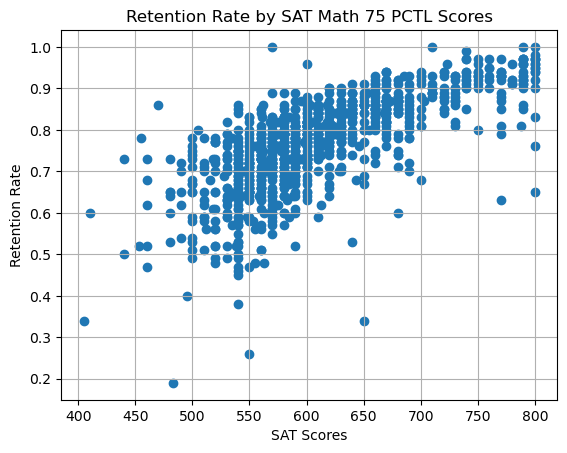

In [10]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df['sat_math_75_pctl'], cleaned_df['retention_rate'])
plt.title('Retention Rate by SAT Math 75 PCTL Scores')
plt.xlabel('SAT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

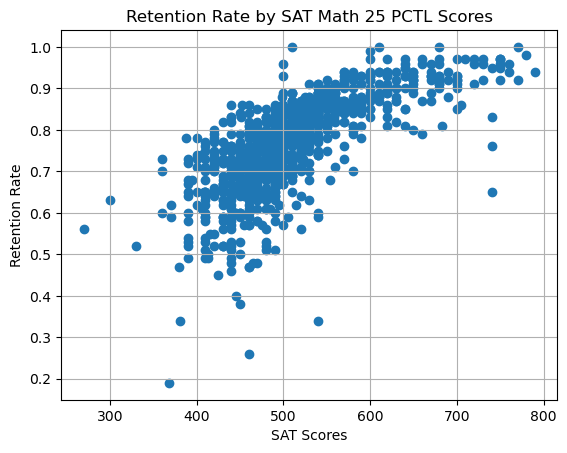

In [11]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df['sat_math_25_pctl'], cleaned_df['retention_rate'])
plt.title('Retention Rate by SAT Math 25 PCTL Scores')
plt.xlabel('SAT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

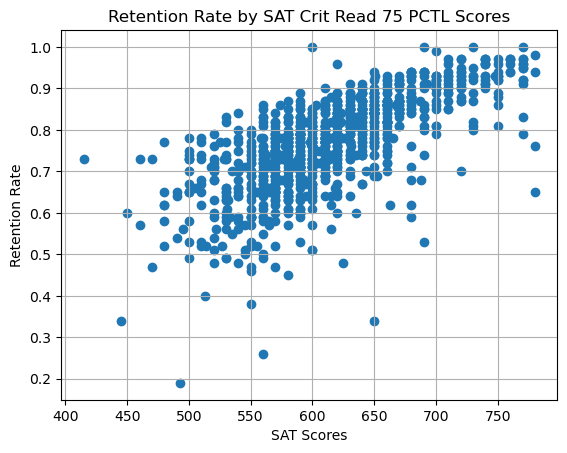

In [12]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df['sat_crit_read_75_pctl'], cleaned_df['retention_rate'])
plt.title('Retention Rate by SAT Crit Read 75 PCTL Scores')
plt.xlabel('SAT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

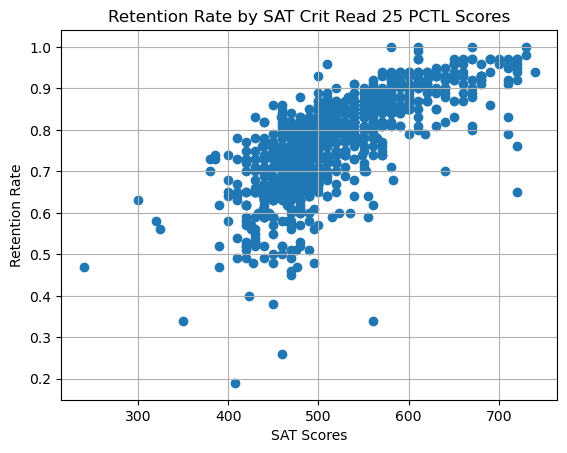

In [13]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df['sat_crit_read_25_pctl'], cleaned_df['retention_rate'])
plt.title('Retention Rate by SAT Crit Read 25 PCTL Scores')
plt.xlabel('SAT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

In [14]:
#We can see the plots for the act scores as well
#keep only the unitid, retention rate, and sat test scores columns
df_filtered_act = combined_df[['unitid', 'retention_rate', 'act_composite_25_pctl', 'act_composite_75_pctl', 'act_english_25_pctl',
       'act_english_75_pctl', 'act_math_25_pctl','act_math_75_pctl',
       ]]
df_filtered_act

unitid  retention_rate  act_composite_25_pctl  act_composite_75_pctl  \
0     100654            0.54                   15.0                   20.0   
1     100663            0.86                   22.0                   30.0   
2     100690            0.50                    NaN                    NaN   
3     100706            0.81                   24.0                   31.0   
4     100724            0.61                   14.0                   20.0   
...      ...             ...                    ...                    ...   
3328  236692             NaN                    NaN                    NaN   
3329  236708             NaN                    NaN                    NaN   
3330  236744            0.90                    NaN                    NaN   
3331  236753             NaN                    NaN                    NaN   
3332  236887             NaN                    NaN                    NaN   

      act_english_25_pctl  act_english_75_pctl  act_math_25_pctl  \
0                    14.0                 20.0              15.0   
1                    22.0                 33.0              20.0   
2                     NaN                  NaN               NaN   
3                    24.0                 33.0              23.0   
4                    14.0                 20.0              14.0   
...                   ...                  ...               ...   
3328                  NaN                  NaN               NaN   
3329                  NaN                  NaN               NaN   
3330                  NaN                  NaN               NaN   
3331                  NaN                  NaN               NaN   
3332                  NaN                  NaN               NaN   

      act_math_75_pctl  
0                 18.0  
1                 27.0  
2                  NaN  
3                 29.0  
4                 20.0  
...                ...  
3328               NaN  
3329               NaN  
3330               NaN  
3331               NaN  
3332               NaN  

[3333 rows x 8 columns]

In [15]:
cleaned_df_act = df_filtered_act.dropna()
cleaned_df_act

unitid  retention_rate  act_composite_25_pctl  act_composite_75_pctl  \
0     100654            0.54                   15.0                   20.0   
1     100663            0.86                   22.0                   30.0   
3     100706            0.81                   24.0                   31.0   
4     100724            0.61                   14.0                   20.0   
5     100751            0.87                   23.0                   31.0   
...      ...             ...                    ...                    ...   
3299  235316            0.92                   25.0                   30.0   
3313  236133            0.83                   19.0                   25.0   
3320  236452            0.76                   17.0                   22.0   
3323  236577            0.76                   20.0                   27.0   
3324  236595            0.82                   24.0                   30.0   

      act_english_25_pctl  act_english_75_pctl  act_math_25_pctl  \
0                    14.0                 20.0              15.0   
1                    22.0                 33.0              20.0   
3                    24.0                 33.0              23.0   
4                    14.0                 20.0              14.0   
5                    23.0                 33.0              21.0   
...                   ...                  ...               ...   
3299                 25.0                 33.0              24.0   
3313                 17.0                 27.0              14.0   
3320                 16.0                 22.0              16.0   
3323                 19.0                 28.0              18.0   
3324                 23.0                 31.0              23.0   

      act_math_75_pctl  
0                 18.0  
1                 27.0  
3                 29.0  
4                 20.0  
5                 29.0  
...                ...  
3299              29.0  
3313              24.0  
3320              22.0  
3323              25.0  
3324              28.0  

[955 rows x 8 columns]

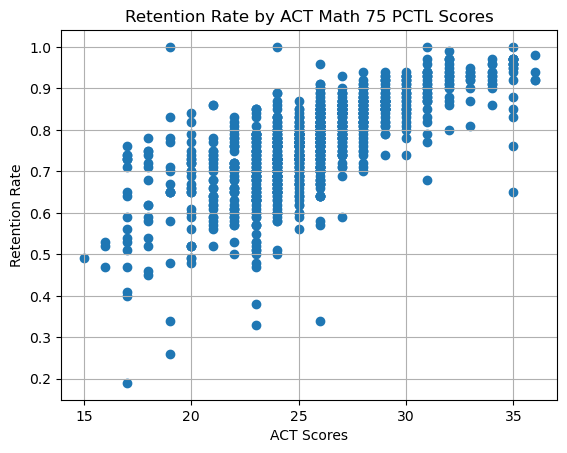

In [16]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df_act['act_math_75_pctl'], cleaned_df_act['retention_rate'])
plt.title('Retention Rate by ACT Math 75 PCTL Scores')
plt.xlabel('ACT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

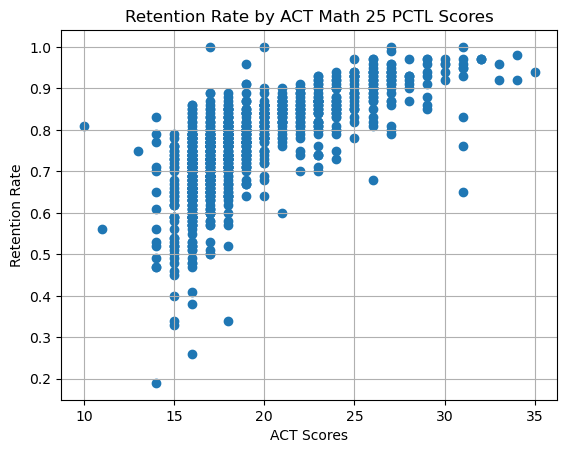

In [17]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df_act['act_math_25_pctl'], cleaned_df_act['retention_rate'])
plt.title('Retention Rate by ACT Math 25 PCTL Scores')
plt.xlabel('ACT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

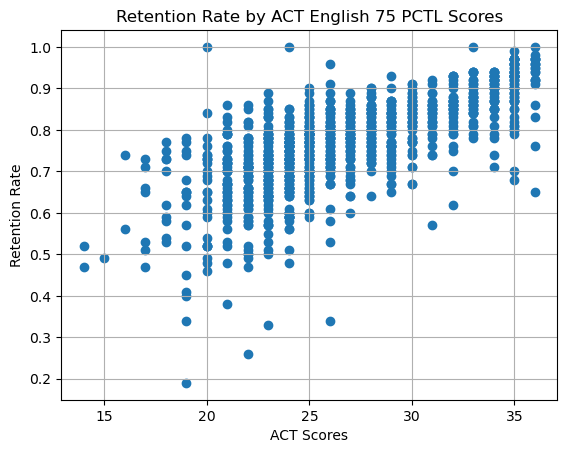

In [18]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df_act['act_english_75_pctl'], cleaned_df_act['retention_rate'])
plt.title('Retention Rate by ACT English 75 PCTL Scores')
plt.xlabel('ACT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

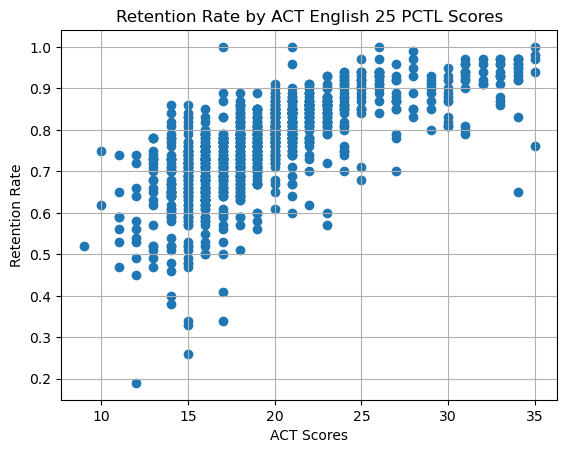

In [19]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df_act['act_english_25_pctl'], cleaned_df_act['retention_rate'])
plt.title('Retention Rate by ACT English 25 PCTL Scores')
plt.xlabel('ACT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

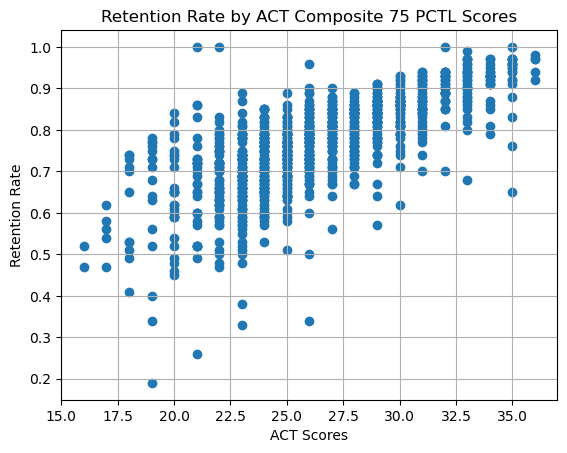

In [20]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df_act['act_composite_75_pctl'], cleaned_df_act['retention_rate'])
plt.title('Retention Rate by ACT Composite 75 PCTL Scores')
plt.xlabel('ACT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

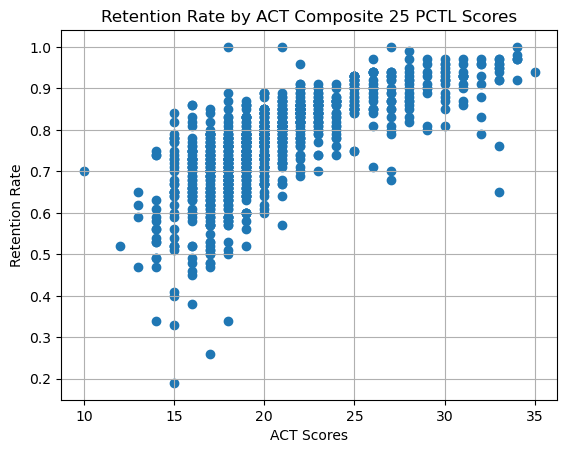

In [21]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df_act['act_composite_25_pctl'], cleaned_df_act['retention_rate'])
plt.title('Retention Rate by ACT Composite 25 PCTL Scores')
plt.xlabel('ACT Scores')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

In [22]:
# As you can see, for both SAT and ACT, as the scores increase the retention rate also increases.  In other words,
#institutions that have a higher-scoring student population tend to have higher retention rates.  This confirms the 
#finding of Marsh 2014 that SAT scores are significant for retention rate.  For lower-end scores,
#the retention rate can vary widely, indicating other factors may be involved affecting retention, while for higher-end scores, 
#the retention rate tends to have less variation.

In [23]:
#I want to consider all the years from 2003-2020
#Get the data
# Initialize an empty DataFrame to store all the data
df_all_years = pd.DataFrame()

for year in range(2003, 2021):  # 2021 is not included, so it goes up to 2020
    url = f"https://educationdata.urban.org/api/v1/college-university/ipeds/fall-retention/{year}/"
    response = urlopen(url)
    data = loads(response.read())
    
    # Temporary DataFrame for the current year
    df_year = pd.DataFrame(data['results'])
    
    # Concatenate the current year's DataFrame with the main DataFrame
    df_all_years = pd.concat([df_all_years, df_year], ignore_index=True)

In [24]:
df_all_years

unitid  year  fips  ftpt  retention_rate  returning_students  \
0       100654  2003     1     1            0.75                 NaN   
1       100654  2003     1     2            0.57                 NaN   
2       100663  2003     1     1            0.75                 NaN   
3       100663  2003     1     2            0.54                 NaN   
4       100690  2003     1     1             NaN                 NaN   
...        ...   ...   ...   ...             ...                 ...   
179995  236753  2020    53    99             NaN                 0.0   
179996  236887  2020    53     1             NaN                 0.0   
179997  236887  2020    53     2             NaN                 0.0   
179998  236887  2020    53    99             NaN                 0.0   
179999  236896  2020    53     1            0.78               328.0   

        prev_cohort  prev_exclusions  prev_cohort_adj  
0               NaN              NaN              NaN  
1               NaN              NaN              NaN  
2               NaN              NaN              NaN  
3               NaN              NaN              NaN  
4               NaN              NaN              NaN  
...             ...              ...              ...  
179995          0.0              0.0              0.0  
179996          0.0              0.0              0.0  
179997          0.0              0.0              0.0  
179998          0.0              0.0              0.0  
179999        423.0              0.0            423.0  

[180000 rows x 9 columns]

In [25]:
#filter for only ftpt=99; that is, we consider the data for both fulltime and parttime students together
df_all_years = df_all_years[df_all_years['ftpt'] == 99]
df_all_years

unitid  year  fips  ftpt  retention_rate  returning_students  \
40002   100654  2007     1    99            0.68               777.0   
40005   100663  2007     1    99            0.74              1140.0   
40008   100690  2007     1    99            1.00                 1.0   
40011   100706  2007     1    99            0.76               636.0   
40014   100724  2007     1    99            0.55               745.0   
...        ...   ...   ...   ...             ...                 ...   
179986  236692  2020    53    99             NaN                 0.0   
179989  236708  2020    53    99             NaN                 0.0   
179992  236744  2020    53    99            0.90                18.0   
179995  236753  2020    53    99             NaN                 0.0   
179998  236887  2020    53    99             NaN                 0.0   

        prev_cohort  prev_exclusions  prev_cohort_adj  
40002        1138.0              0.0           1138.0  
40005        1531.0              0.0           1531.0  
40008           1.0              0.0              1.0  
40011         838.0              0.0            838.0  
40014        1345.0              1.0           1344.0  
...             ...              ...              ...  
179986          0.0              0.0              0.0  
179989          0.0              0.0              0.0  
179992         20.0              0.0             20.0  
179995          0.0              0.0              0.0  
179998          0.0              0.0              0.0  

[46662 rows x 9 columns]

In [26]:
#Load test scores data for all years 2003-2020
df_results_all_years = pd.DataFrame()

for year in range(2003, 2021):  # Assuming you're interested in years 2003 through 2020
    url = f"https://educationdata.urban.org/api/v1/college-university/ipeds/admissions-requirements/{year}/"
    response = urlopen(url)
    data = loads(response.read())
    
    df_year = pd.DataFrame(data['results'])
    
    df_results_all_years = pd.concat([df_results_all_years, df_year], ignore_index=True)

In [27]:
df_results_all_years

year  fips  unitid reqt_hs_diploma  reqt_hs_rank  reqt_test_scores  \
0       2003   1.0  100636            None           0.0               1.0   
1       2003   1.0  100654            None           2.0               1.0   
2       2003   1.0  100663            None           0.0               1.0   
3       2003   1.0  100690            None          -2.0              -2.0   
4       2003   1.0  100706            None           0.0               1.0   
...      ...   ...     ...             ...           ...               ...   
129452  2020  47.0  496292            None           NaN               NaN   
129453  2020  16.0  496326            None           NaN               NaN   
129454  2020  39.0  496371            None           NaN               NaN   
129455  2020  12.0  496414            None           NaN               NaN   
129456  2020  53.0  496423            None           NaN               NaN   

       reqt_sat_scores  reqt_other_test reqt_residence  \
0                 None              NaN           None   
1                 None              NaN           None   
2                 None              NaN           None   
3                 None              NaN           None   
4                 None              NaN           None   
...                ...              ...            ...   
129452            None              NaN           None   
129453            None              NaN           None   
129454            None              NaN           None   
129455            None              NaN           None   
129456            None              NaN           None   

       reqt_ability_to_benefit  ... act_writing_25_pctl  act_writing_75_pctl  \
0                         None  ...                 NaN                  NaN   
1                         None  ...                 NaN                  NaN   
2                         None  ...                 NaN                  NaN   
3                         None  ...                 NaN                  NaN   
4                         None  ...                 NaN                  NaN   
...                        ...  ...                 ...                  ...   
129452                    None  ...                 NaN                  NaN   
129453                    None  ...                 NaN                  NaN   
129454                    None  ...                 NaN                  NaN   
129455                    None  ...                 NaN                  NaN   
129456                    None  ...                 NaN                  NaN   

       reqt_work  reqt_legacy_status reqt_personal_statement  \
0           None                None                    None   
1           None                None                    None   
2           None                None                    None   
3           None                None                    None   
4           None                None                    None   
...          ...                 ...                     ...   
129452      None                None                    None   
129453      None                None                    None   
129454      None                None                    None   
129455      None                None                    None   
129456      None                None                    None   

        act_composite_50_pctl  act_english_50_pctl  act_math_50_pctl  \
0                        None                 None              None   
1                        None                 None              None   
2                        None                 None              None   
3                        None                 None              None   
4                        None                 None              None   
...                       ...                  ...               ...   
129452                   None                 None              None   
129453                   None                 None              None

In [28]:
# Merge the two DataFrames on 'unitid' and 'year'
df_combined = pd.merge(df_results_all_years, df_all_years, on=['unitid', 'year'])
df_combined

year  fips_x  unitid reqt_hs_diploma  reqt_hs_rank  reqt_test_scores  \
0      2007     1.0  100654            None           2.0               1.0   
1      2007     1.0  100663            None           0.0               1.0   
2      2007     1.0  100690            None          -2.0              -2.0   
3      2007     1.0  100706            None           0.0               1.0   
4      2007     1.0  100724            None           0.0               2.0   
...     ...     ...     ...             ...           ...               ...   
46657  2020    53.0  236692            None           NaN               NaN   
46658  2020    53.0  236708            None           NaN               NaN   
46659  2020    53.0  236744            None           NaN               NaN   
46660  2020    53.0  236753            None           NaN               NaN   
46661  2020    53.0  236887            None           NaN               NaN   

      reqt_sat_scores  reqt_other_test reqt_residence reqt_ability_to_benefit  \
0                None              0.0           None                    None   
1                None              0.0           None                    None   
2                None             -2.0           None                    None   
3                None              0.0           None                    None   
4                None             -1.0           None                    None   
...               ...              ...            ...                     ...   
46657            None              NaN           None                    None   
46658            None              NaN           None                    None   
46659            None              NaN           None                    None   
46660            None              NaN           None                    None   
46661            None              NaN           None                    None   

       ... act_math_50_pctl  sat_crit_read_50_pctl sat_math_50_pctl  fips_y  \
0      ...             None                   None             None       1   
1      ...             None                   None             None       1   
2      ...             None                   None             None       1   
3      ...             None                   None             None       1   
4      ...             None                   None             None       1   
...    ...              ...                    ...              ...     ...   
46657  ...             None                   None             None      53   
46658  ...             None                   None             None      53   
46659  ...             None                   None             None      53   
46660  ...             None                   None             None      53   
46661  ...             None                   None             None      53   

      ftpt  retention_rate  returning_students  prev_cohort  prev_exclusions  \
0       99            0.68               777.0       1138.0              0.0   
1       99            0.74              1140.0       1531.0              0.0   
2       99            1.00                 1.0          1.0              0.0   
3       99            0.76               636.0        838.0              0.0   
4       99            0.55               745.0       1345.0              1.0   
...    ...             ...                 ...          ...              ...   
46657   99             NaN                 0.0          0.0              0.0   
46658   99             NaN                 0.0          0.0              0.0   
46659   99            0.90                18.0         20.0              0.0   
46660   99             NaN                 0.0          0.0              0.0   
46661   99             NaN                 0.0          0.0              0.0   

       prev_cohort_adj  
0               1138.0  
1               1531.0  
2                  1.0  
3                838.0  
4               1344.0  
...                ...  


In [29]:
#keep only the unitid, retention rate, and sat test scores columns
df_filtered_all_years = df_combined[['year','unitid', 'retention_rate', 'sat_crit_read_25_pctl','sat_crit_read_75_pctl','sat_math_25_pctl','sat_math_75_pctl']]
df_filtered_all_years

year  unitid  retention_rate  sat_crit_read_25_pctl  \
0      2007  100654            0.68                    NaN   
1      2007  100663            0.74                  470.0   
2      2007  100690            1.00                    NaN   
3      2007  100706            0.76                  490.0   
4      2007  100724            0.55                  350.0   
...     ...     ...             ...                    ...   
46657  2020  236692             NaN                    NaN   
46658  2020  236708             NaN                    NaN   
46659  2020  236744            0.90                    NaN   
46660  2020  236753             NaN                    NaN   
46661  2020  236887             NaN                    NaN   

       sat_crit_read_75_pctl  sat_math_25_pctl  sat_math_75_pctl  
0                        NaN               NaN               NaN  
1                      620.0             500.0             650.0  
2                        NaN               NaN               NaN  
3                      610.0             490.0             620.0  
4                      460.0             340.0             440.0  
...                      ...               ...               ...  
46657                    NaN               NaN               NaN  
46658                    NaN               NaN               NaN  
46659                    NaN               NaN               NaN  
46660                    NaN               NaN               NaN  
46661                    NaN               NaN               NaN  

[46662 rows x 7 columns]

In [30]:
cleaned_df_all_years = df_filtered_all_years.dropna()
cleaned_df_all_years

year  unitid  retention_rate  sat_crit_read_25_pctl  \
1      2007  100663            0.74                  470.0   
3      2007  100706            0.76                  490.0   
4      2007  100724            0.55                  350.0   
5      2007  100751            0.87                  490.0   
8      2007  100858            0.86                  500.0   
...     ...     ...             ...                    ...   
46628  2020  235316            0.92                  580.0   
46642  2020  236133            0.83                  510.0   
46649  2020  236452            0.76                  470.0   
46652  2020  236577            0.76                  510.0   
46653  2020  236595            0.82                  570.0   

       sat_crit_read_75_pctl  sat_math_25_pctl  sat_math_75_pctl  
1                      620.0             500.0             650.0  
3                      610.0             490.0             620.0  
4                      460.0             340.0             440.0  
5                      610.0             500.0             620.0  
8                      610.0             520.0             630.0  
...                      ...               ...               ...  
46628                  670.0             580.0             680.0  
46642                  620.0             500.0             585.0  
46649                  580.0             480.0             560.0  
46652                  590.0             500.0             570.0  
46653                  660.0             560.0             670.0  

[13915 rows x 7 columns]

C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3757790853.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3757790853.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3757790853.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3757790853.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3757790853.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\375779085

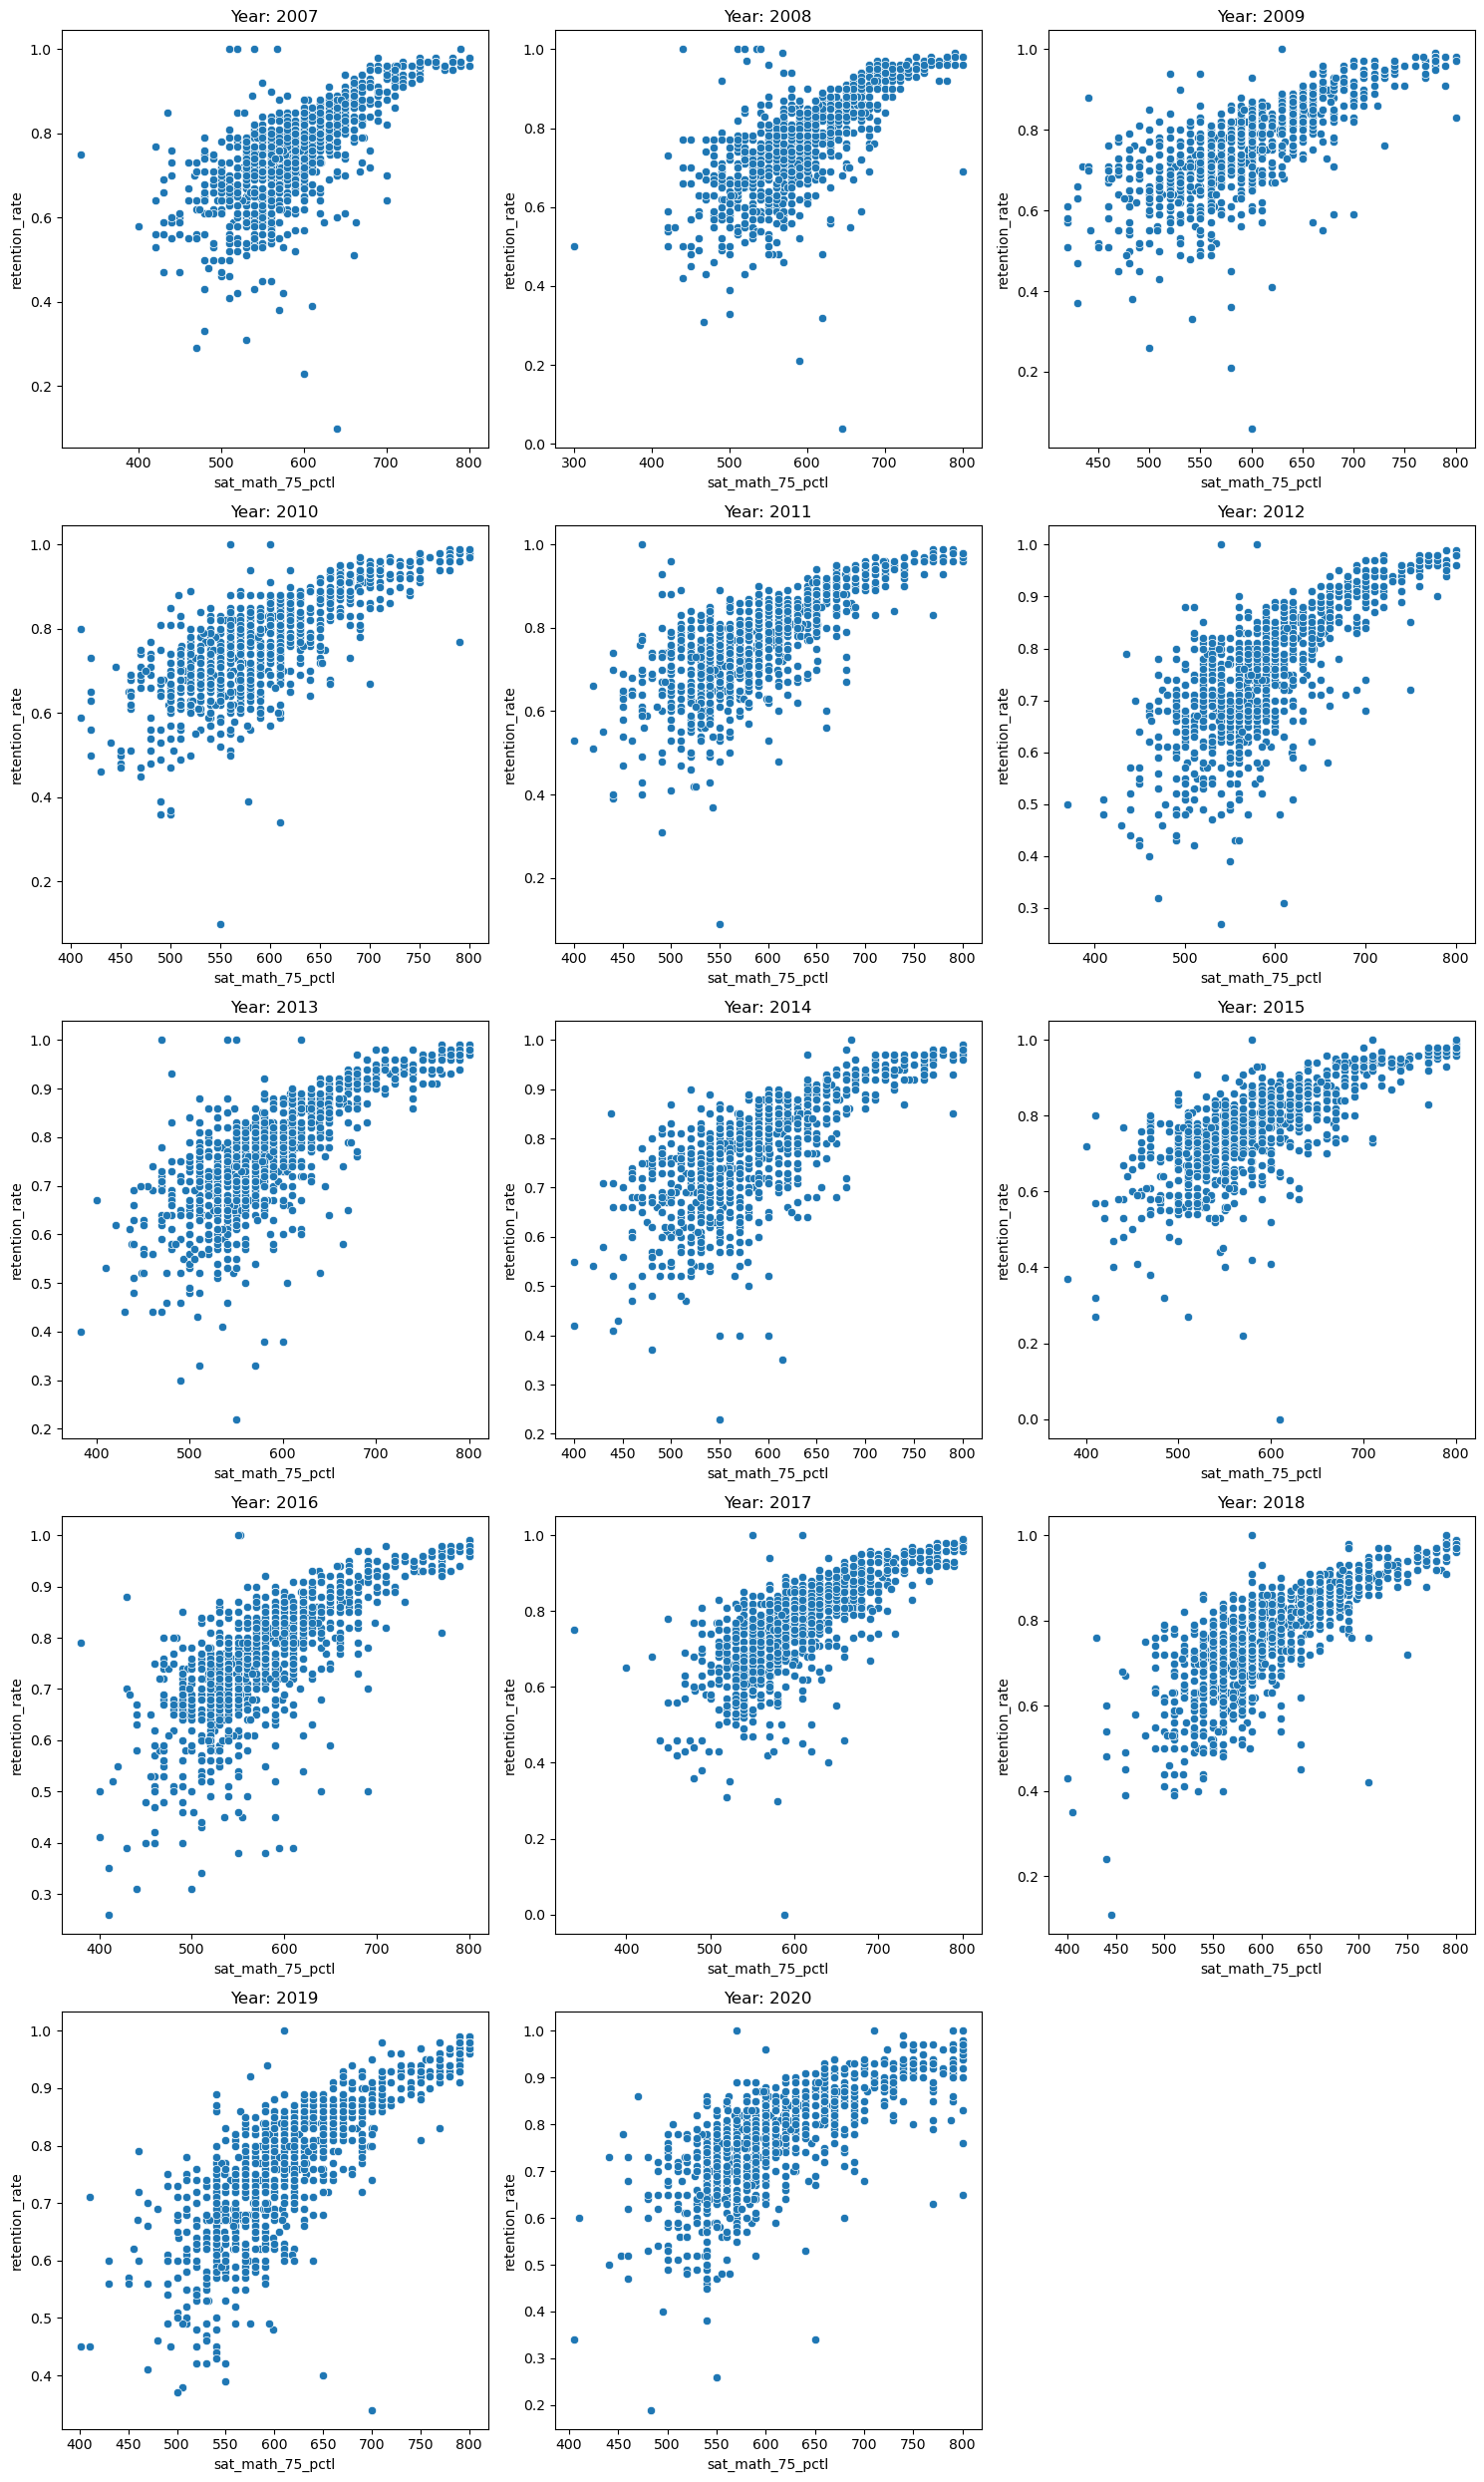

In [31]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='sat_math_75_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots



C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3483074603.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3483074603.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3483074603.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3483074603.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3483074603.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\348307460

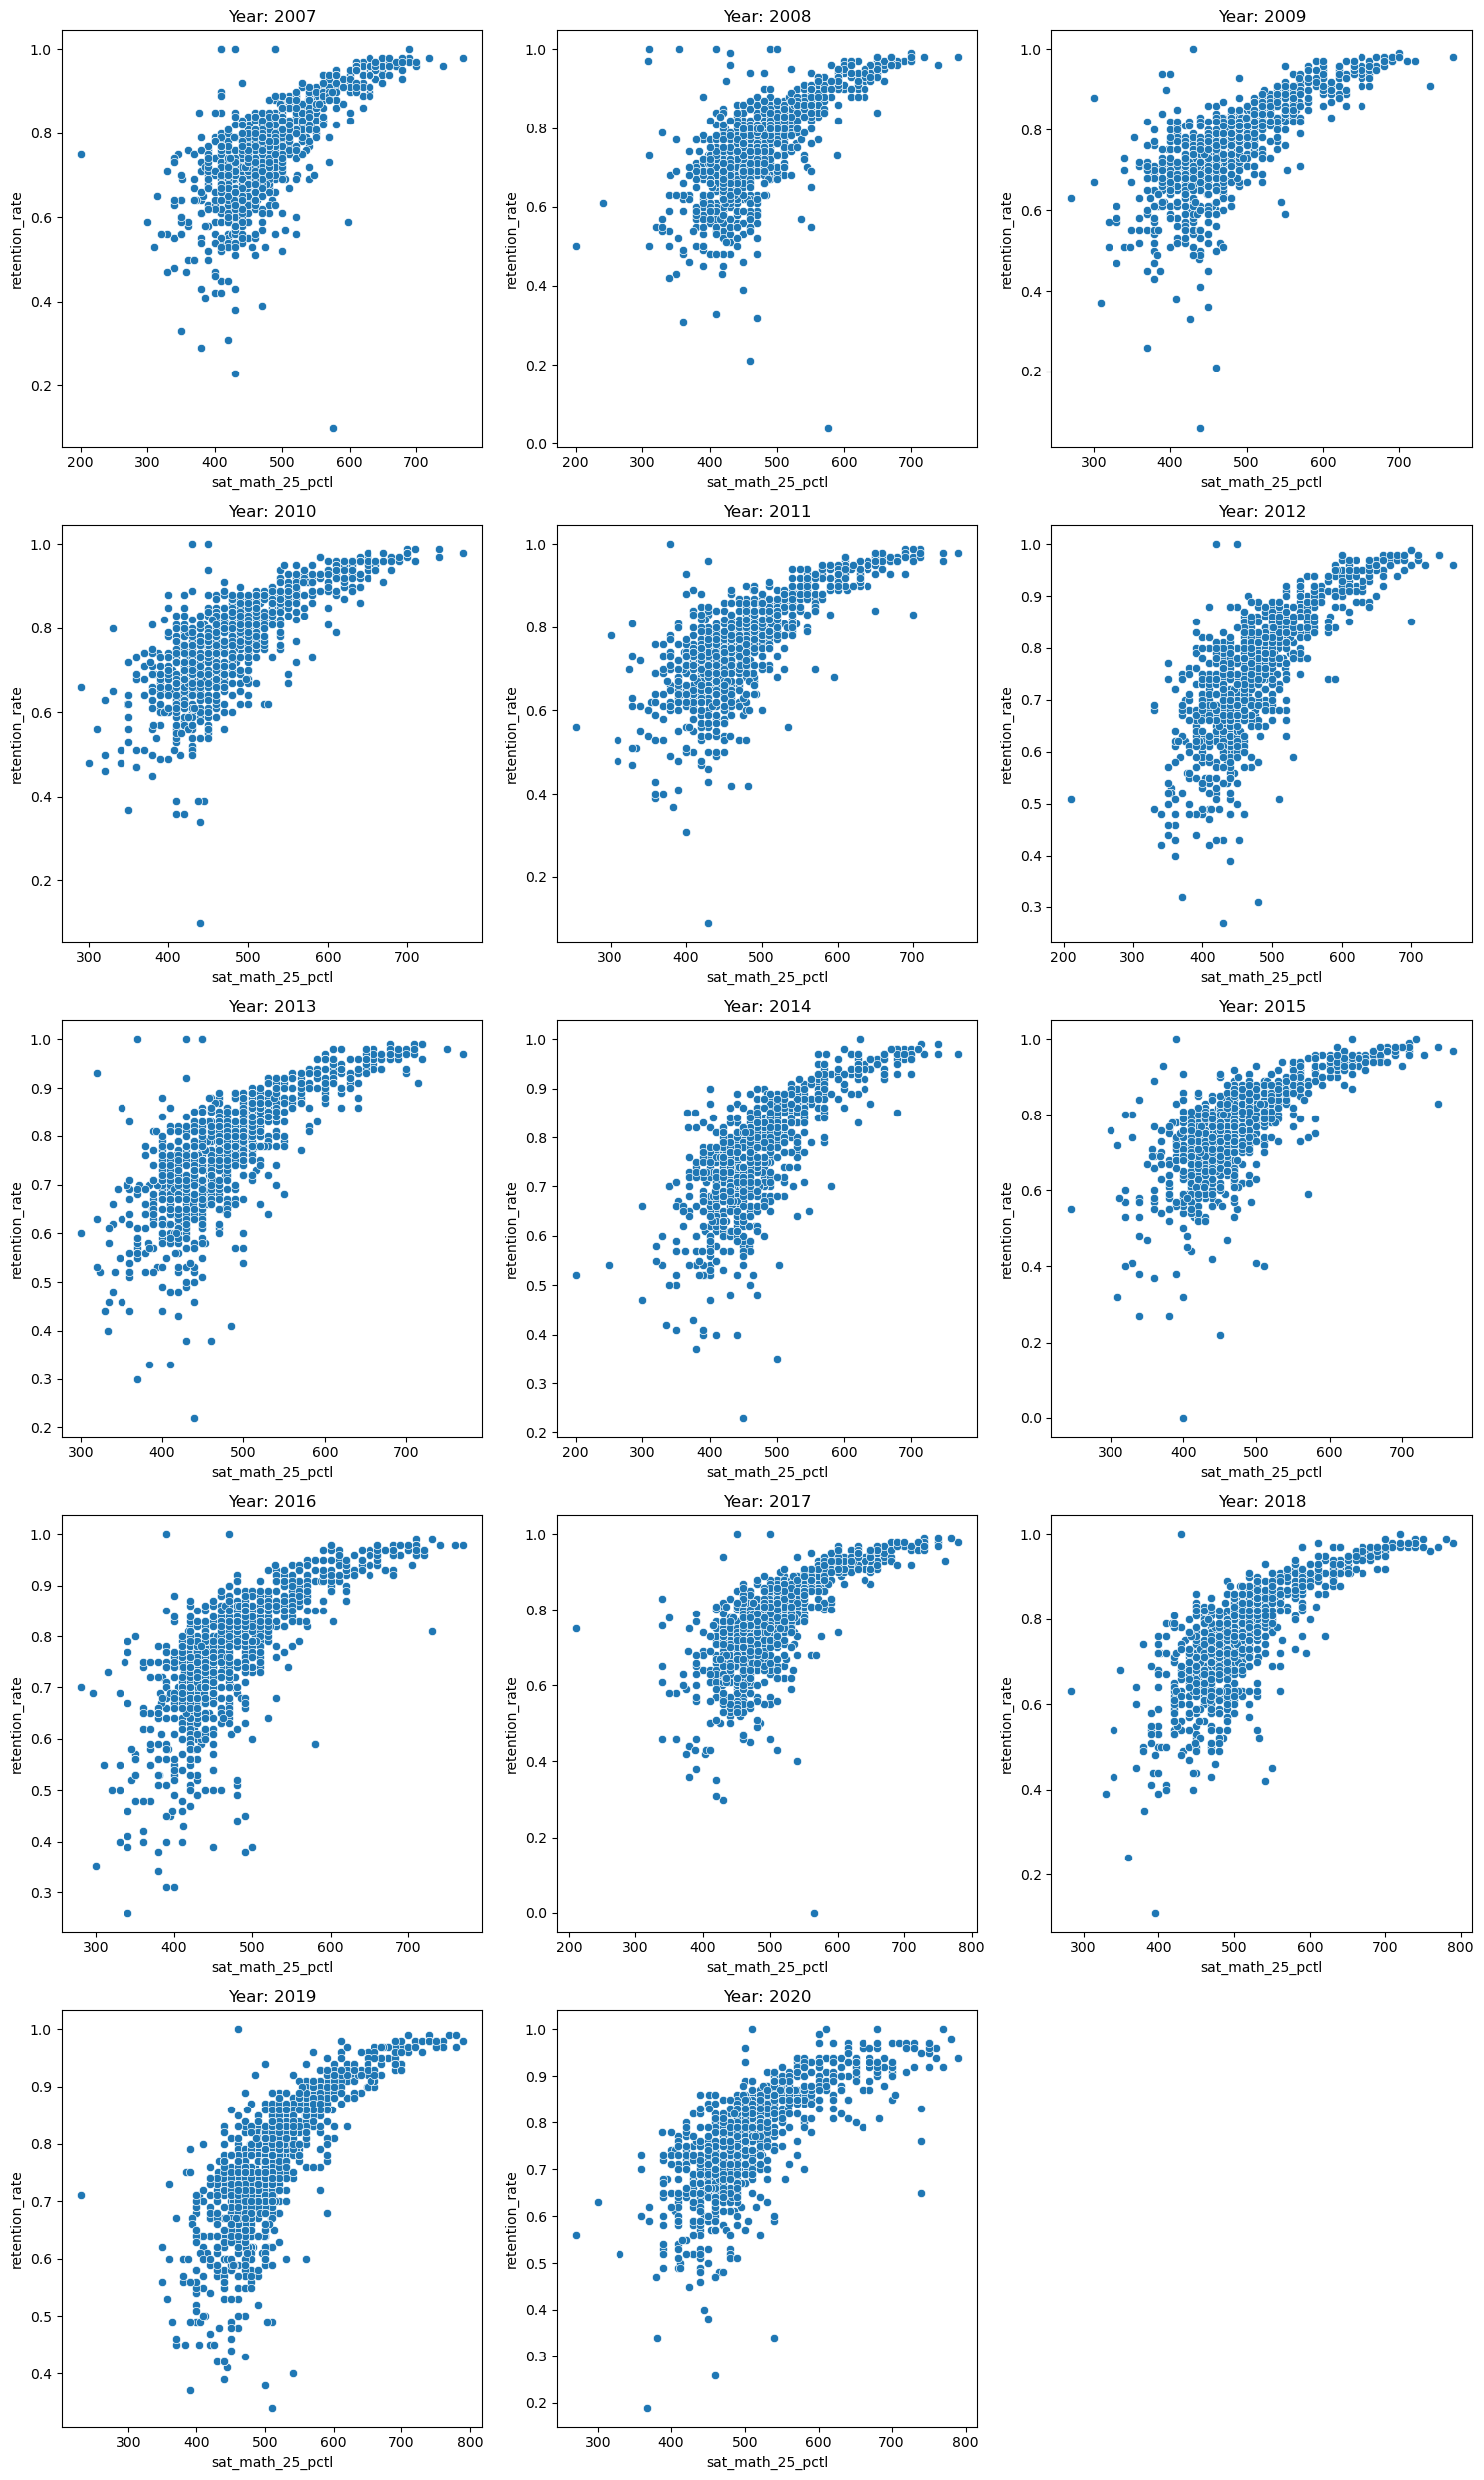

In [32]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='sat_math_25_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots

C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\513967400.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\513967400.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\513967400.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\513967400.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\513967400.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\513967400.py:1

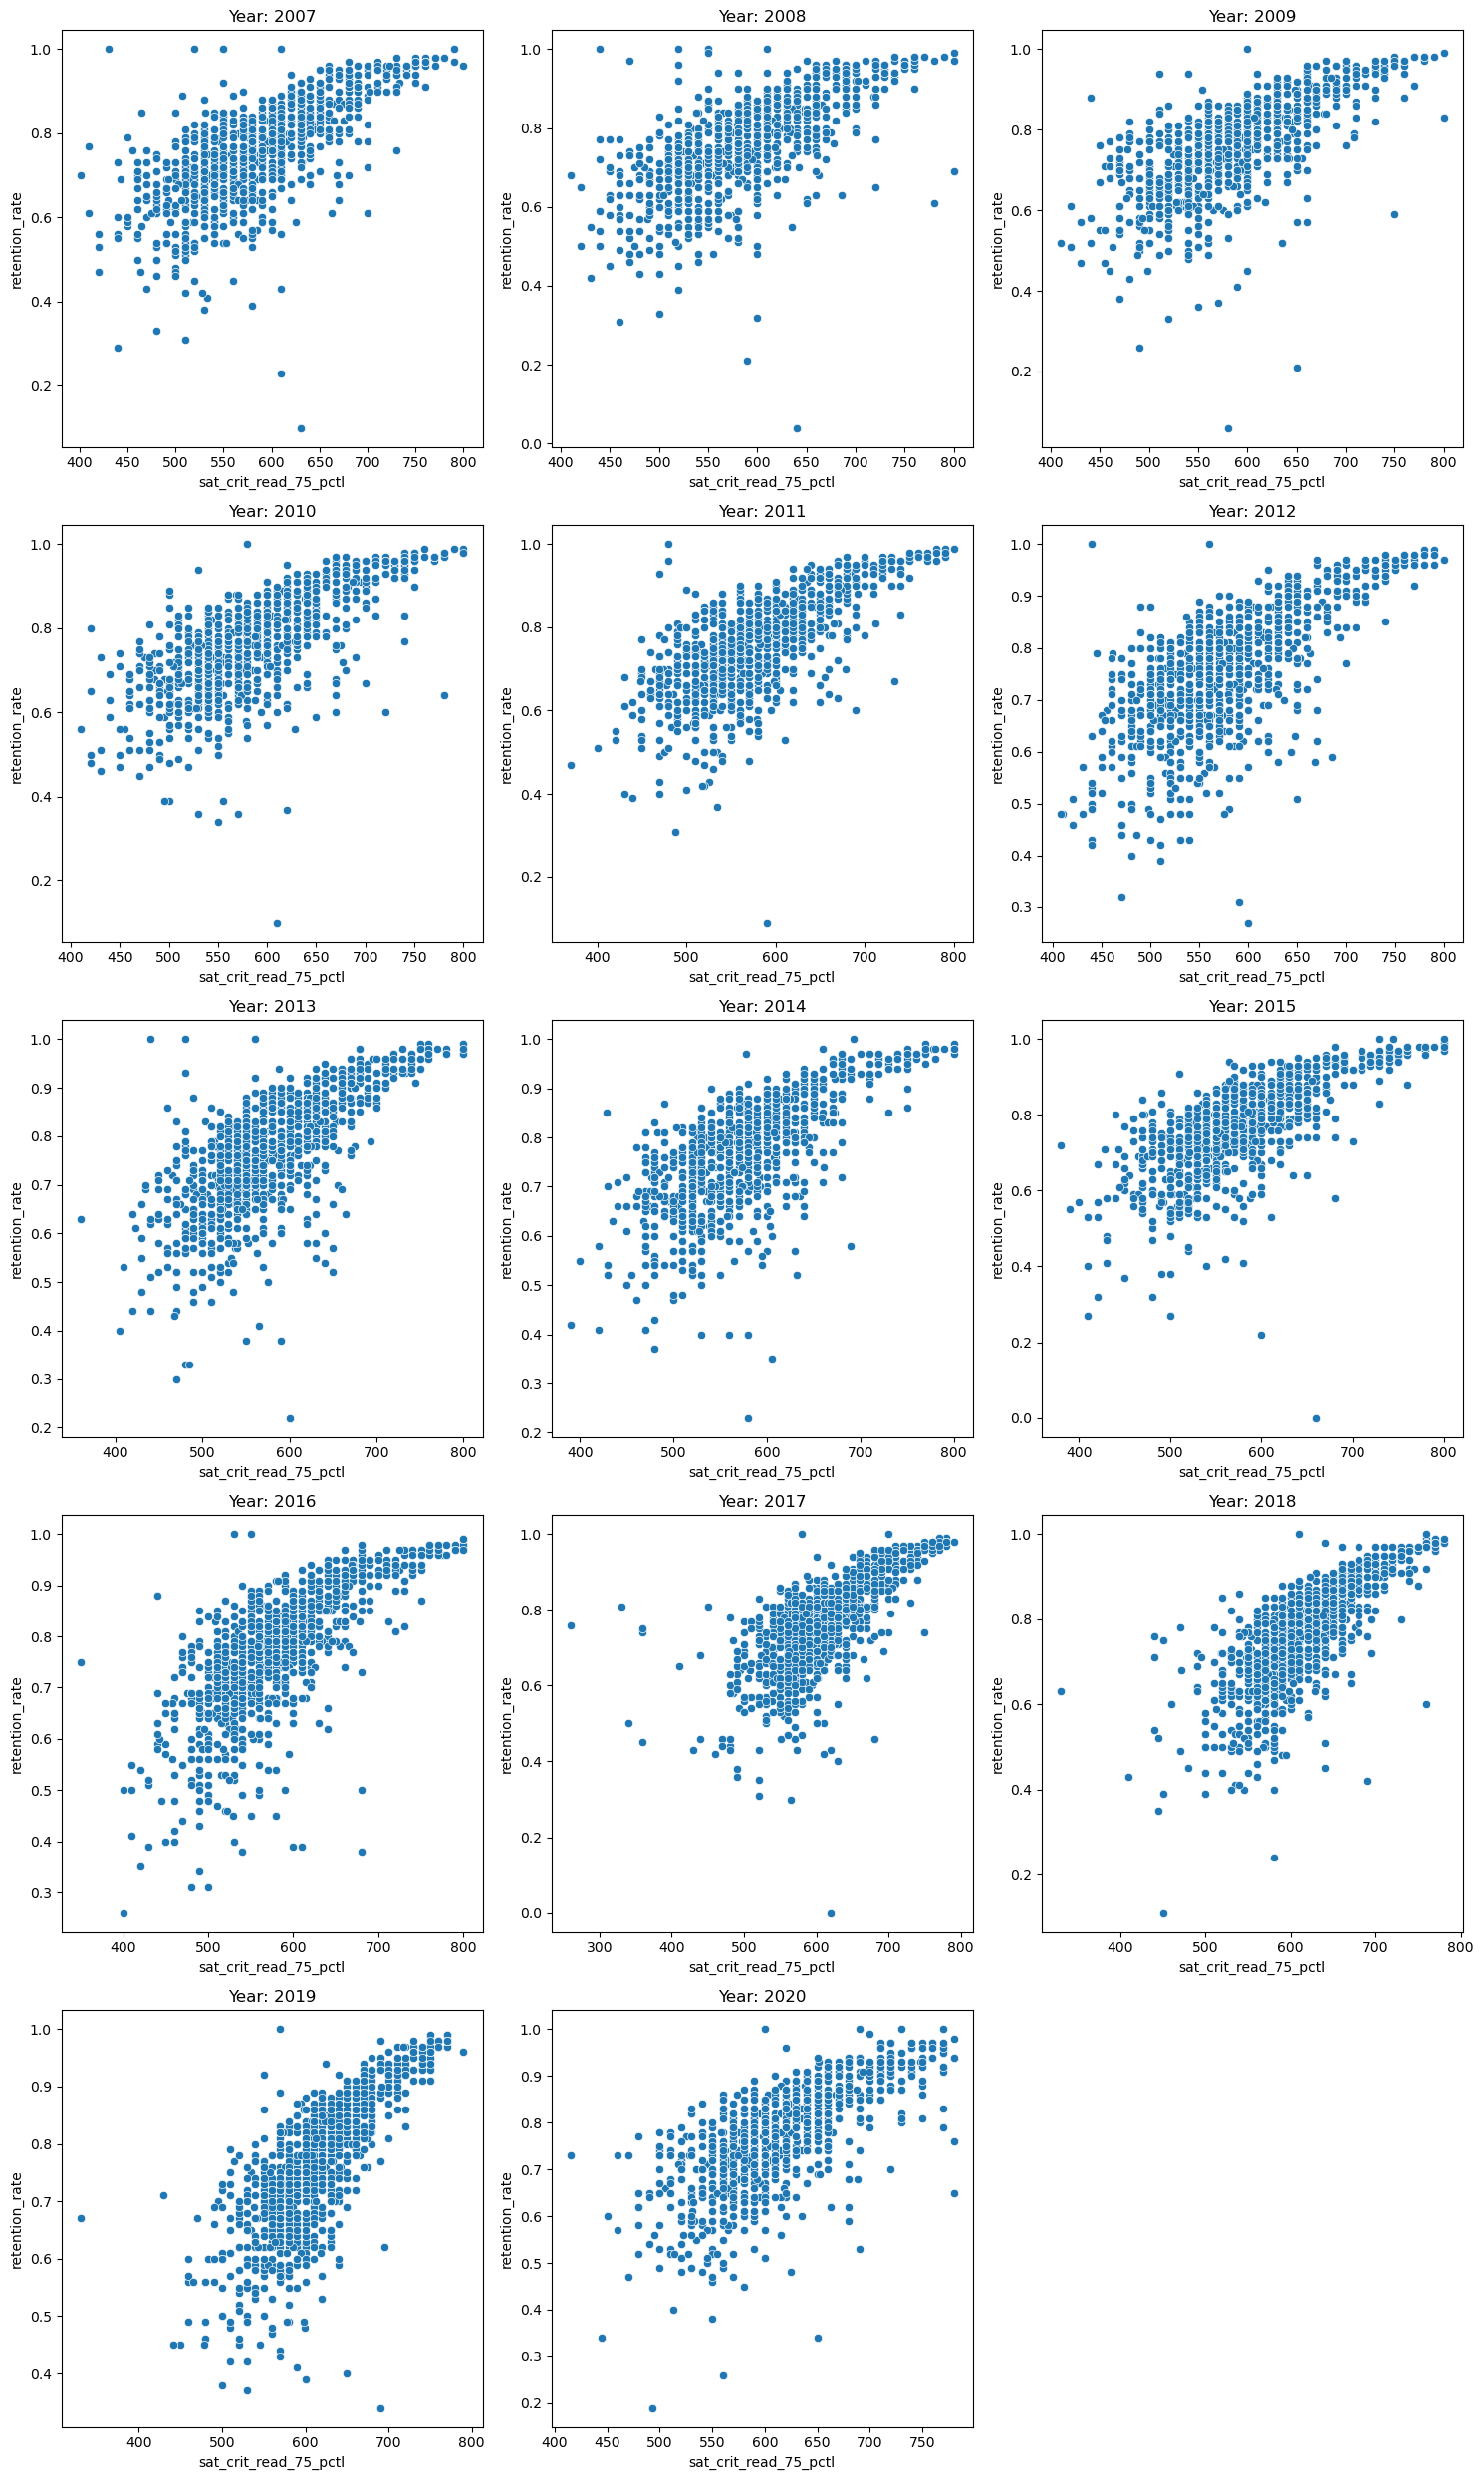

In [33]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='sat_crit_read_75_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots

C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3120181113.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3120181113.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3120181113.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3120181113.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\3120181113.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\312018111

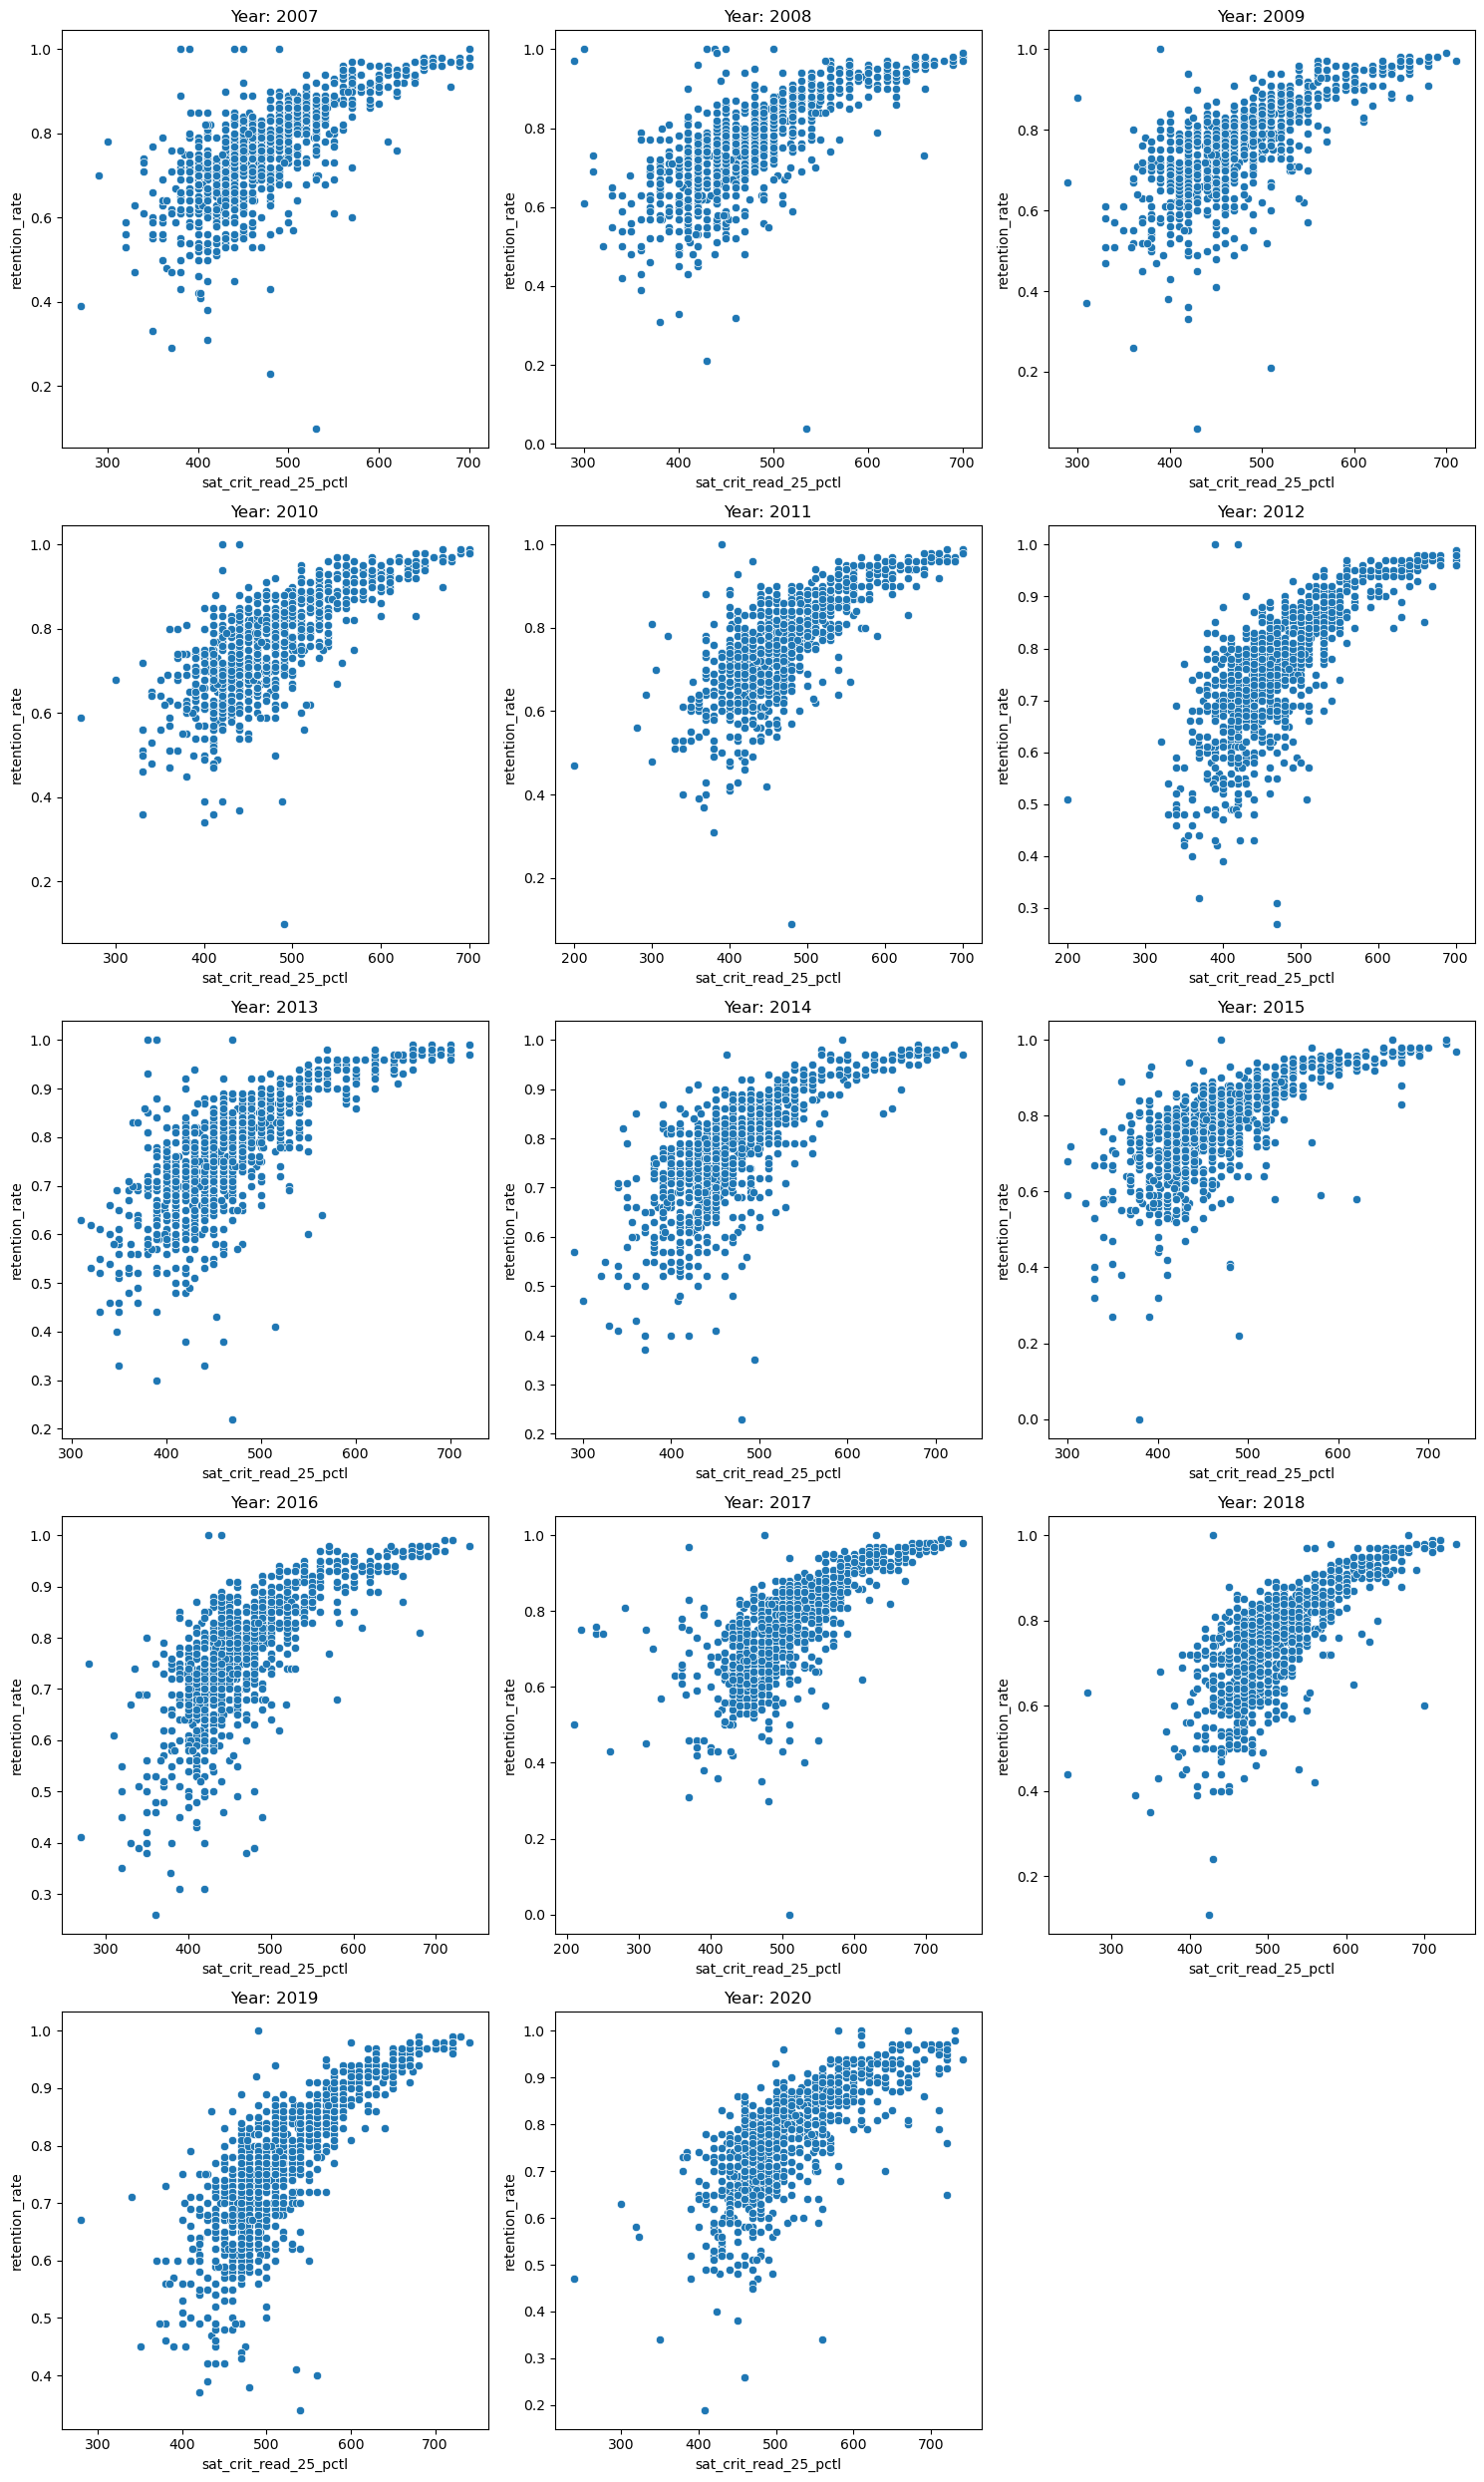

In [34]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='sat_crit_read_25_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots

In [35]:
#As you can see, for the years 2007-2020, the retention rate increases as the score increases.

In [36]:
#keep only the unitid, retention rate, and act test scores columns
df_filtered_all_years = df_combined[['year','unitid', 'retention_rate', 'act_english_25_pctl','act_english_75_pctl','act_math_25_pctl','act_math_75_pctl']]
df_filtered_all_years

year  unitid  retention_rate  act_english_25_pctl  act_english_75_pctl  \
0      2007  100654            0.68                 15.0                 20.0   
1      2007  100663            0.74                 21.0                 28.0   
2      2007  100690            1.00                  NaN                  NaN   
3      2007  100706            0.76                 20.0                 28.0   
4      2007  100724            0.55                 13.0                 18.0   
...     ...     ...             ...                  ...                  ...   
46657  2020  236692             NaN                  NaN                  NaN   
46658  2020  236708             NaN                  NaN                  NaN   
46659  2020  236744            0.90                  NaN                  NaN   
46660  2020  236753             NaN                  NaN                  NaN   
46661  2020  236887             NaN                  NaN                  NaN   

       act_math_25_pctl  act_math_75_pctl  
0                  16.0              18.0  
1                  19.0              25.0  
2                   NaN               NaN  
3                  21.0              26.0  
4                  15.0              17.0  
...                 ...               ...  
46657               NaN               NaN  
46658               NaN               NaN  
46659               NaN               NaN  
46660               NaN               NaN  
46661               NaN               NaN  

[46662 rows x 7 columns]

In [37]:
cleaned_df_all_years = df_filtered_all_years.dropna()
cleaned_df_all_years

year  unitid  retention_rate  act_english_25_pctl  act_english_75_pctl  \
0      2007  100654            0.68                 15.0                 20.0   
1      2007  100663            0.74                 21.0                 28.0   
3      2007  100706            0.76                 20.0                 28.0   
4      2007  100724            0.55                 13.0                 18.0   
5      2007  100751            0.87                 21.0                 28.0   
...     ...     ...             ...                  ...                  ...   
46628  2020  235316            0.92                 25.0                 33.0   
46642  2020  236133            0.83                 17.0                 27.0   
46649  2020  236452            0.76                 16.0                 22.0   
46652  2020  236577            0.76                 19.0                 28.0   
46653  2020  236595            0.82                 23.0                 31.0   

       act_math_25_pctl  act_math_75_pctl  
0                  16.0              18.0  
1                  19.0              25.0  
3                  21.0              26.0  
4                  15.0              17.0  
5                  20.0              26.0  
...                 ...               ...  
46628              24.0              29.0  
46642              14.0              24.0  
46649              16.0              22.0  
46652              18.0              25.0  
46653              23.0              28.0  

[12663 rows x 7 columns]

C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\507351713.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\507351713.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\507351713.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\507351713.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\507351713.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\507351713.py:1

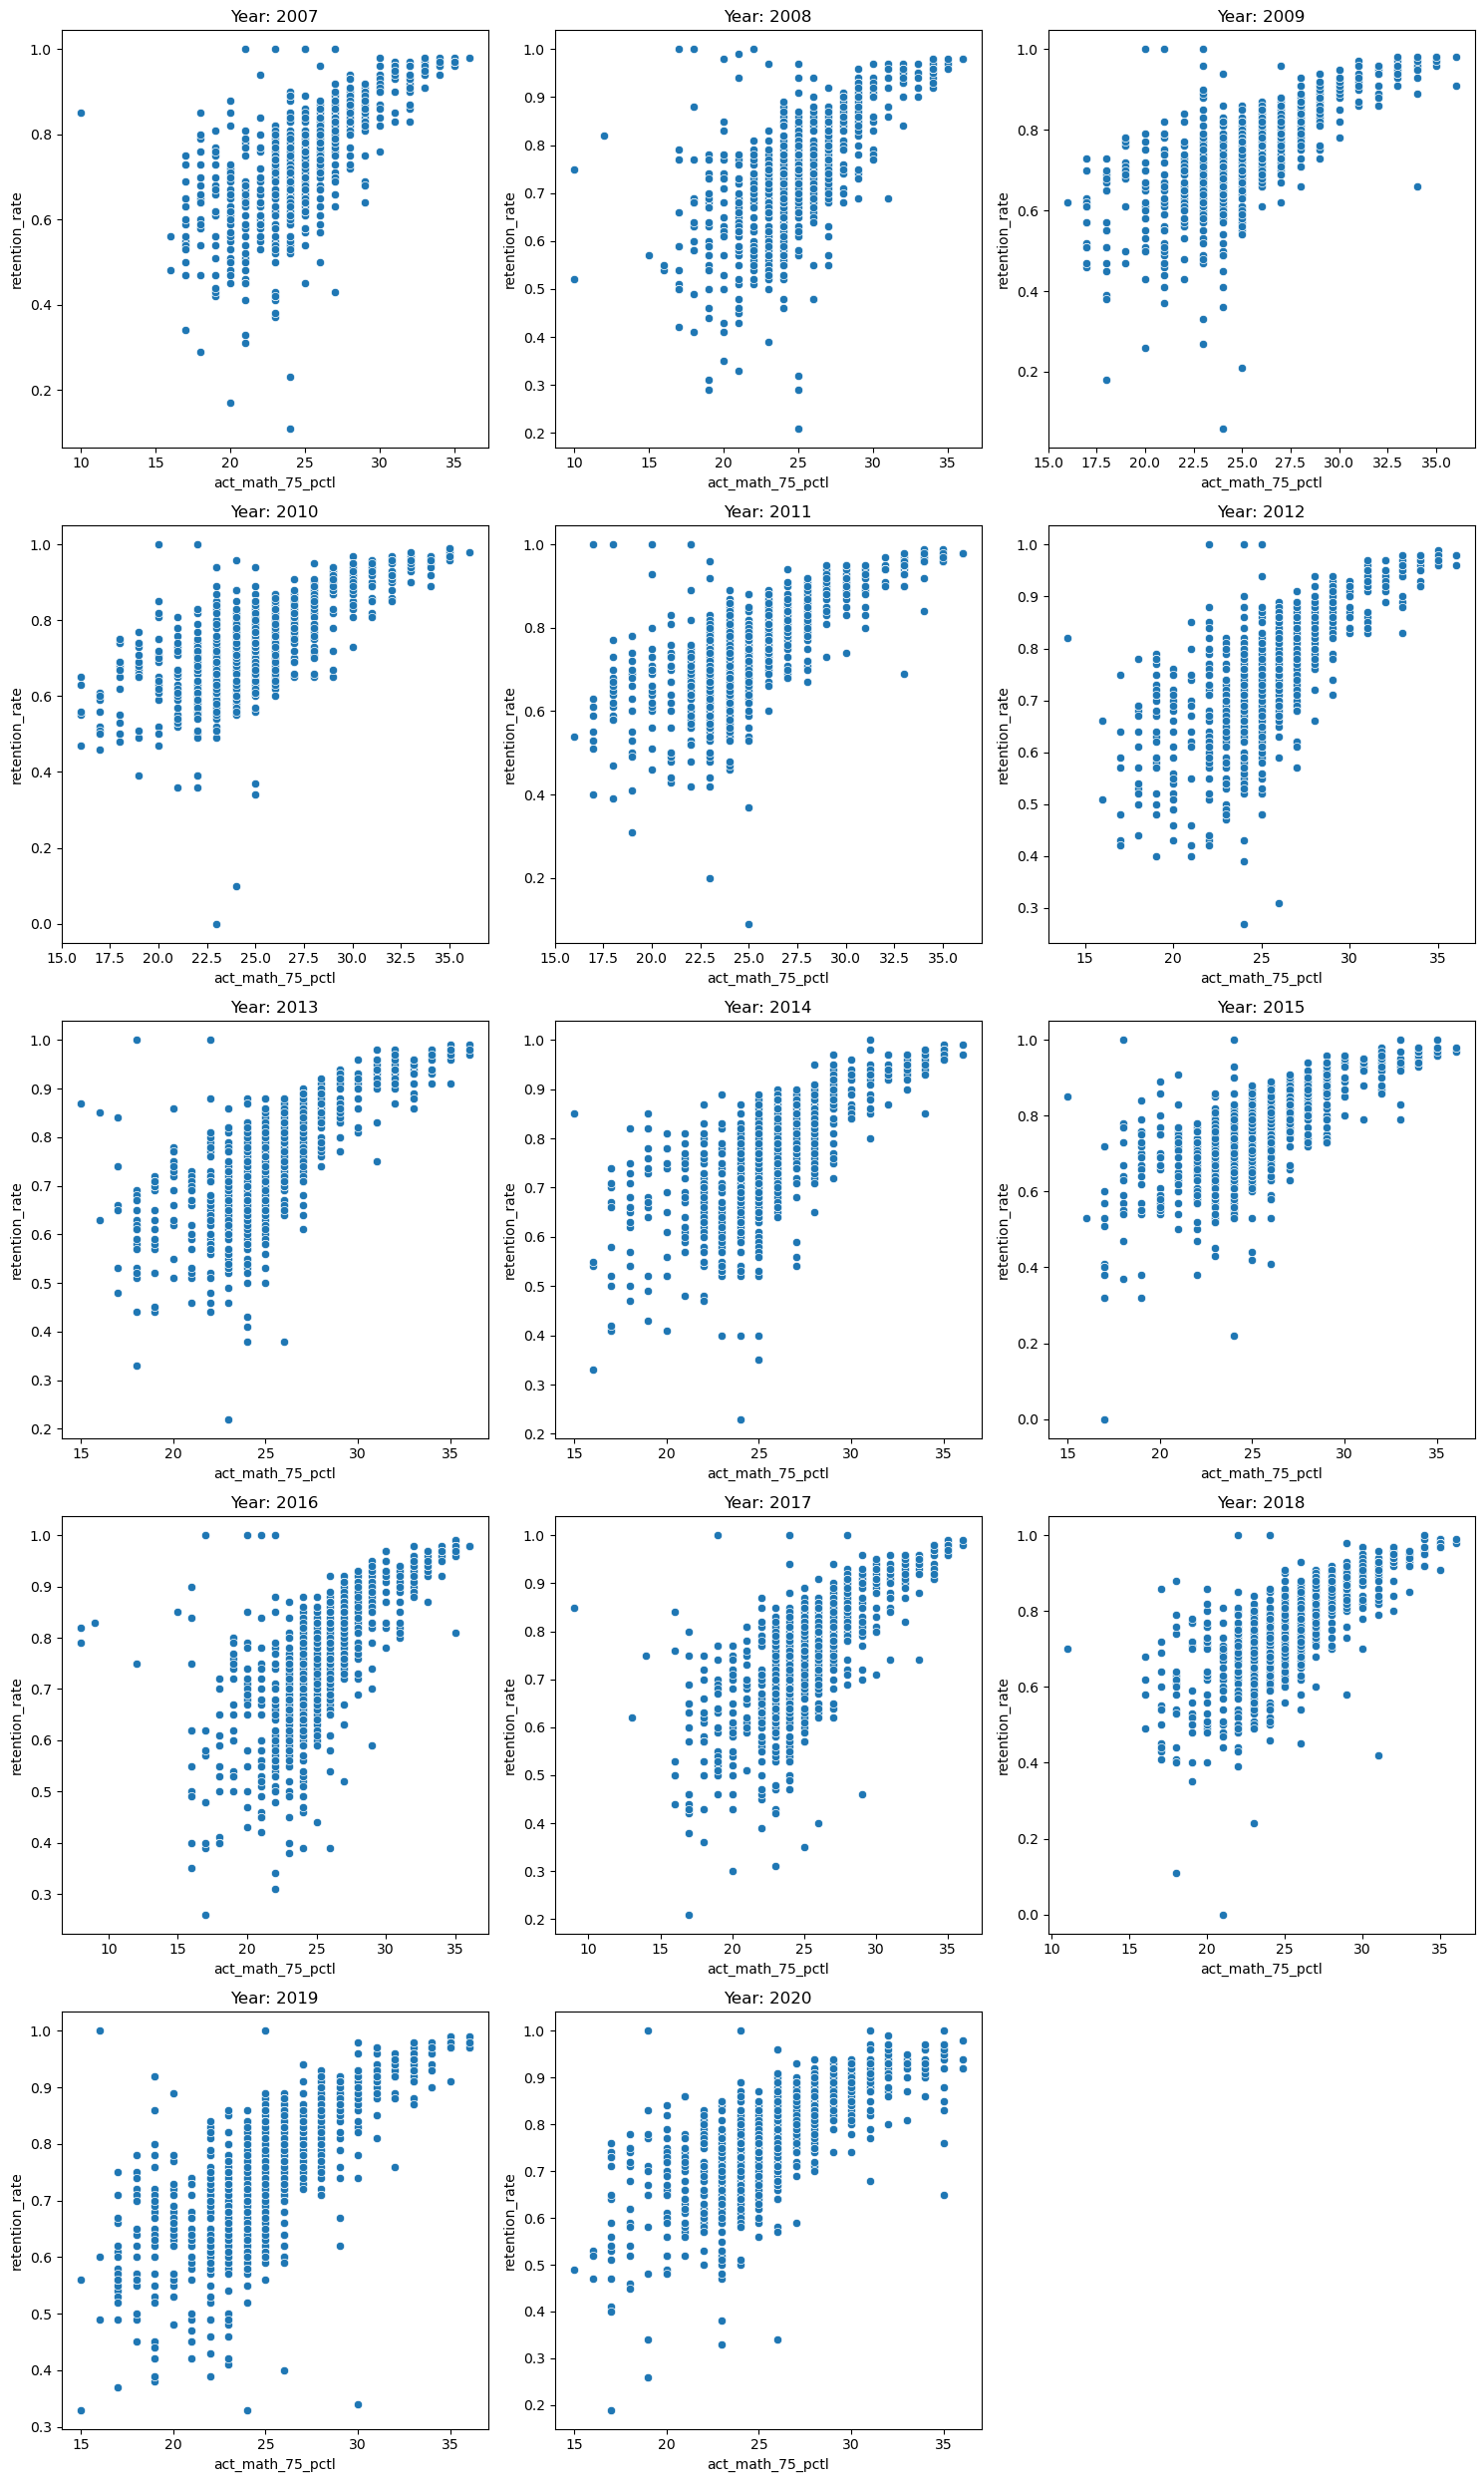

In [38]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='act_math_75_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots



C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2135985025.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2135985025.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2135985025.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2135985025.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2135985025.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\213598502

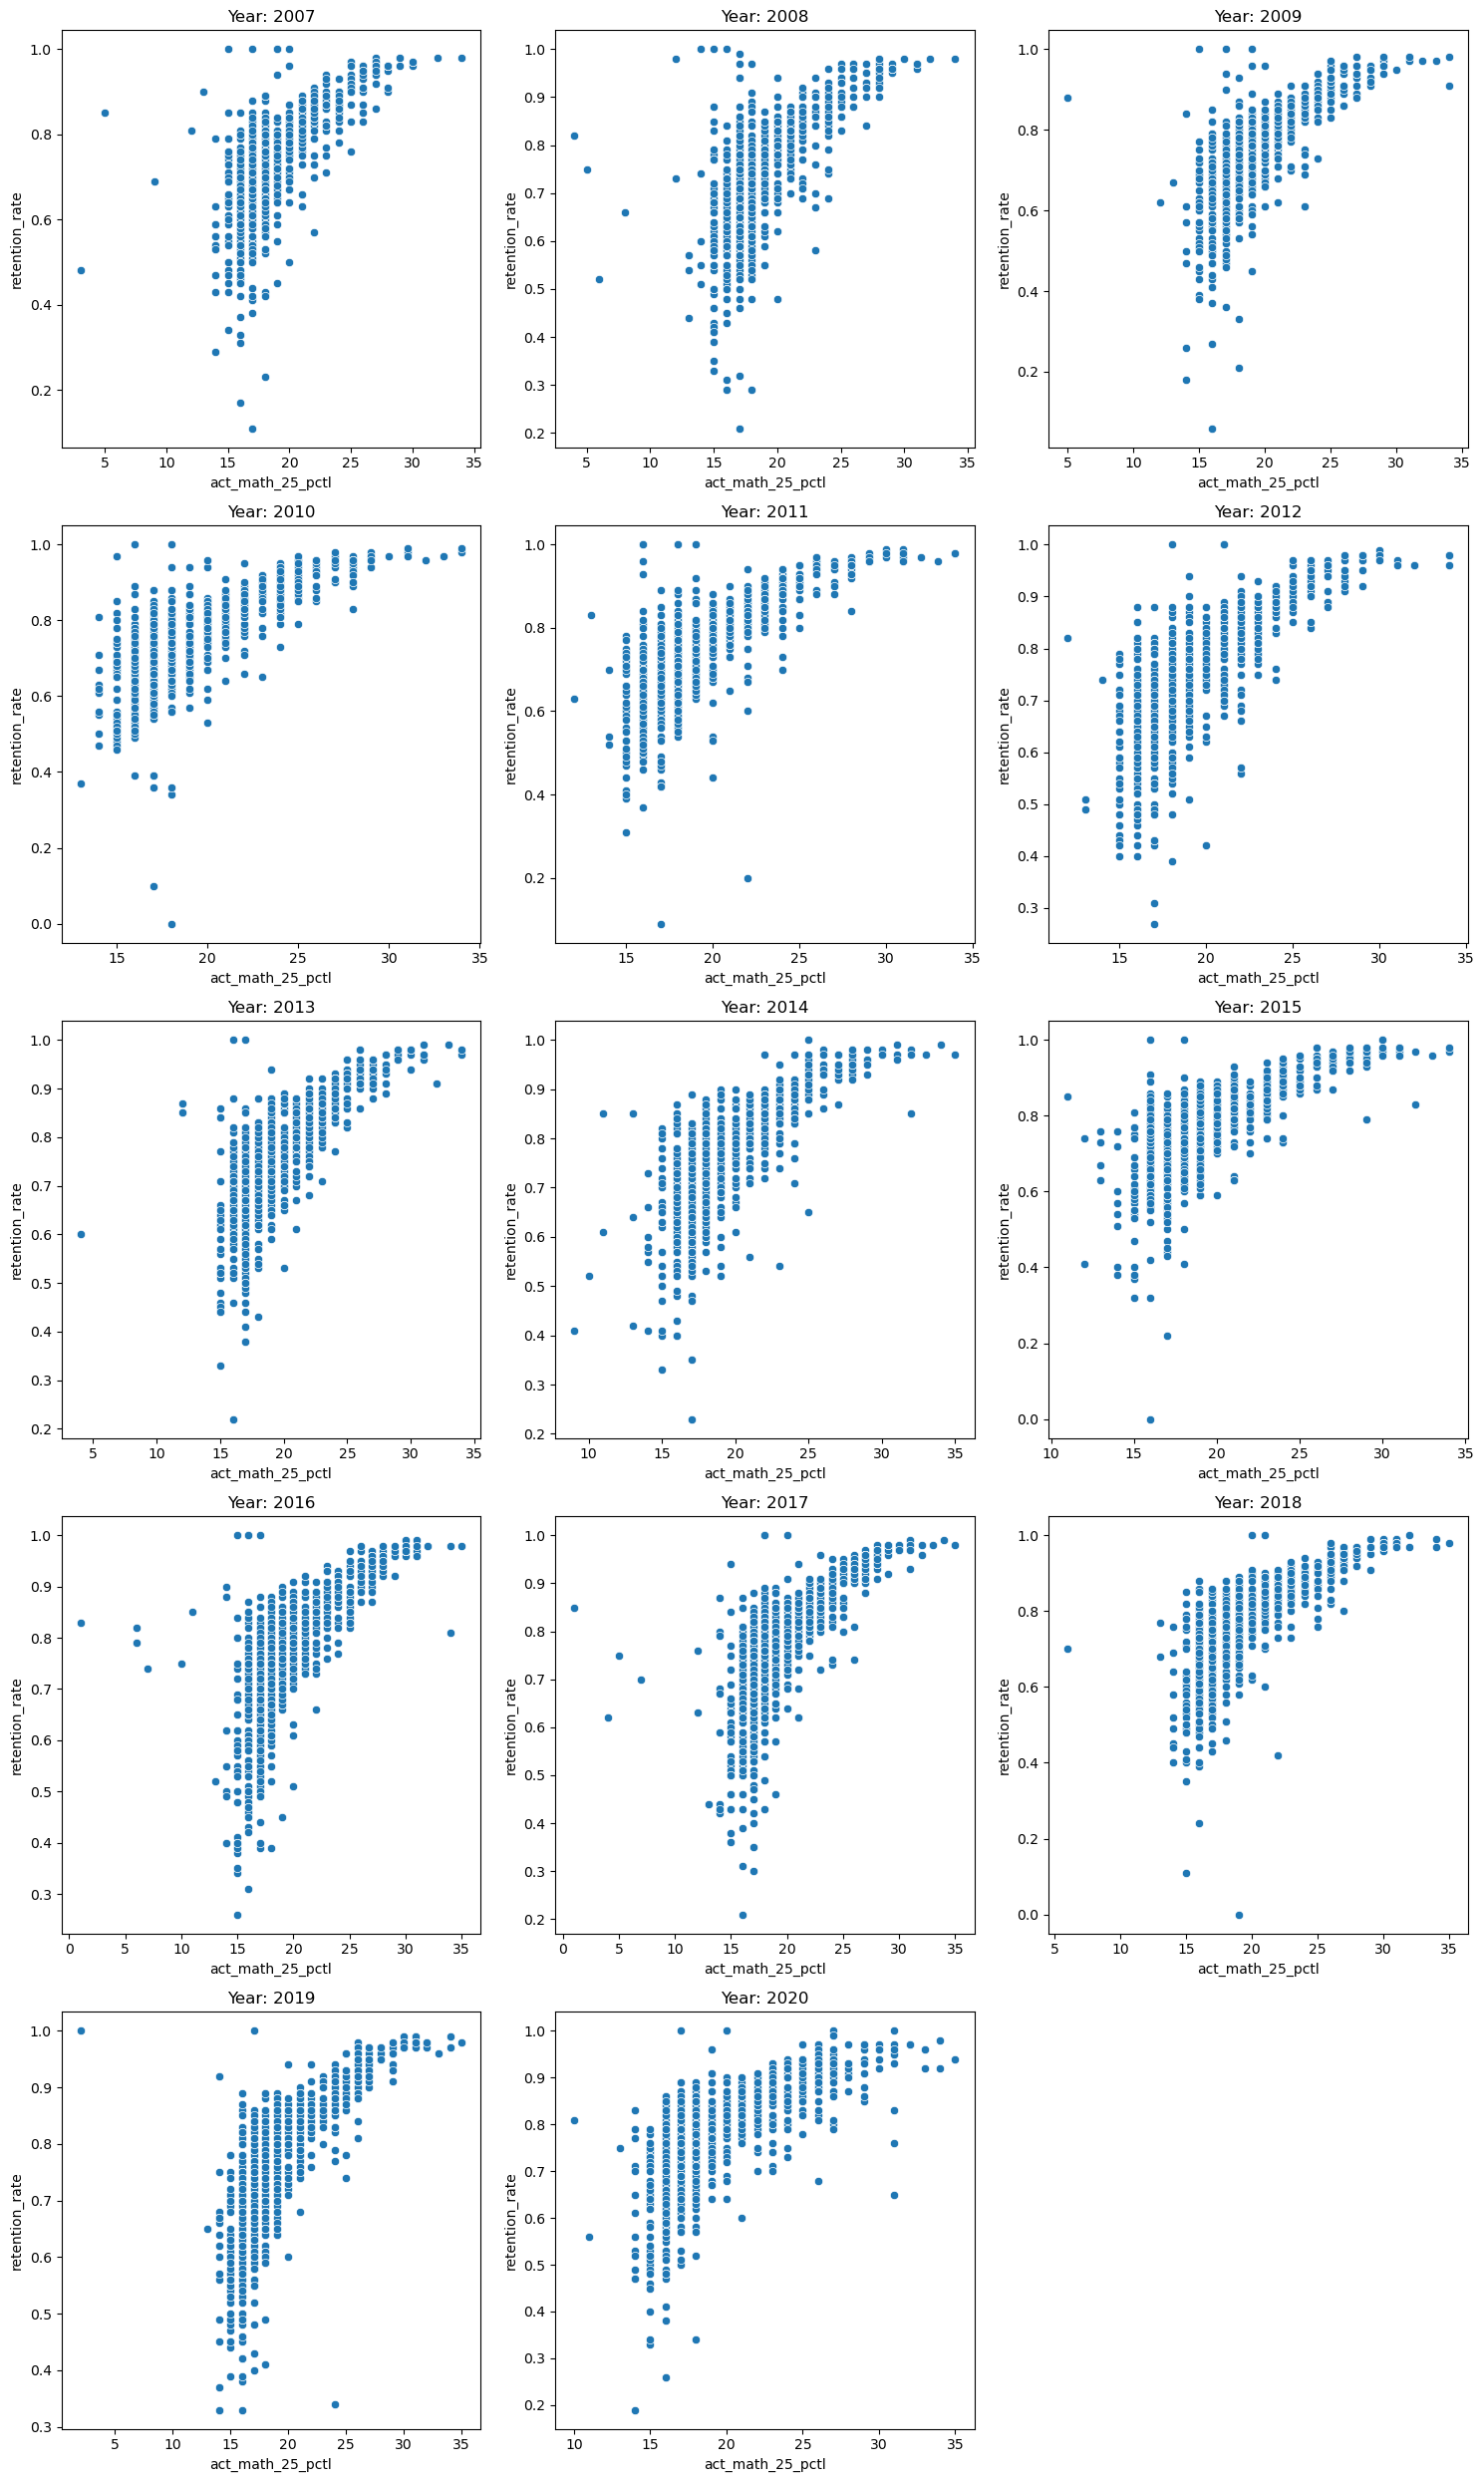

In [39]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='act_math_25_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots



C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\136909069.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\136909069.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\136909069.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\136909069.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\136909069.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\136909069.py:1

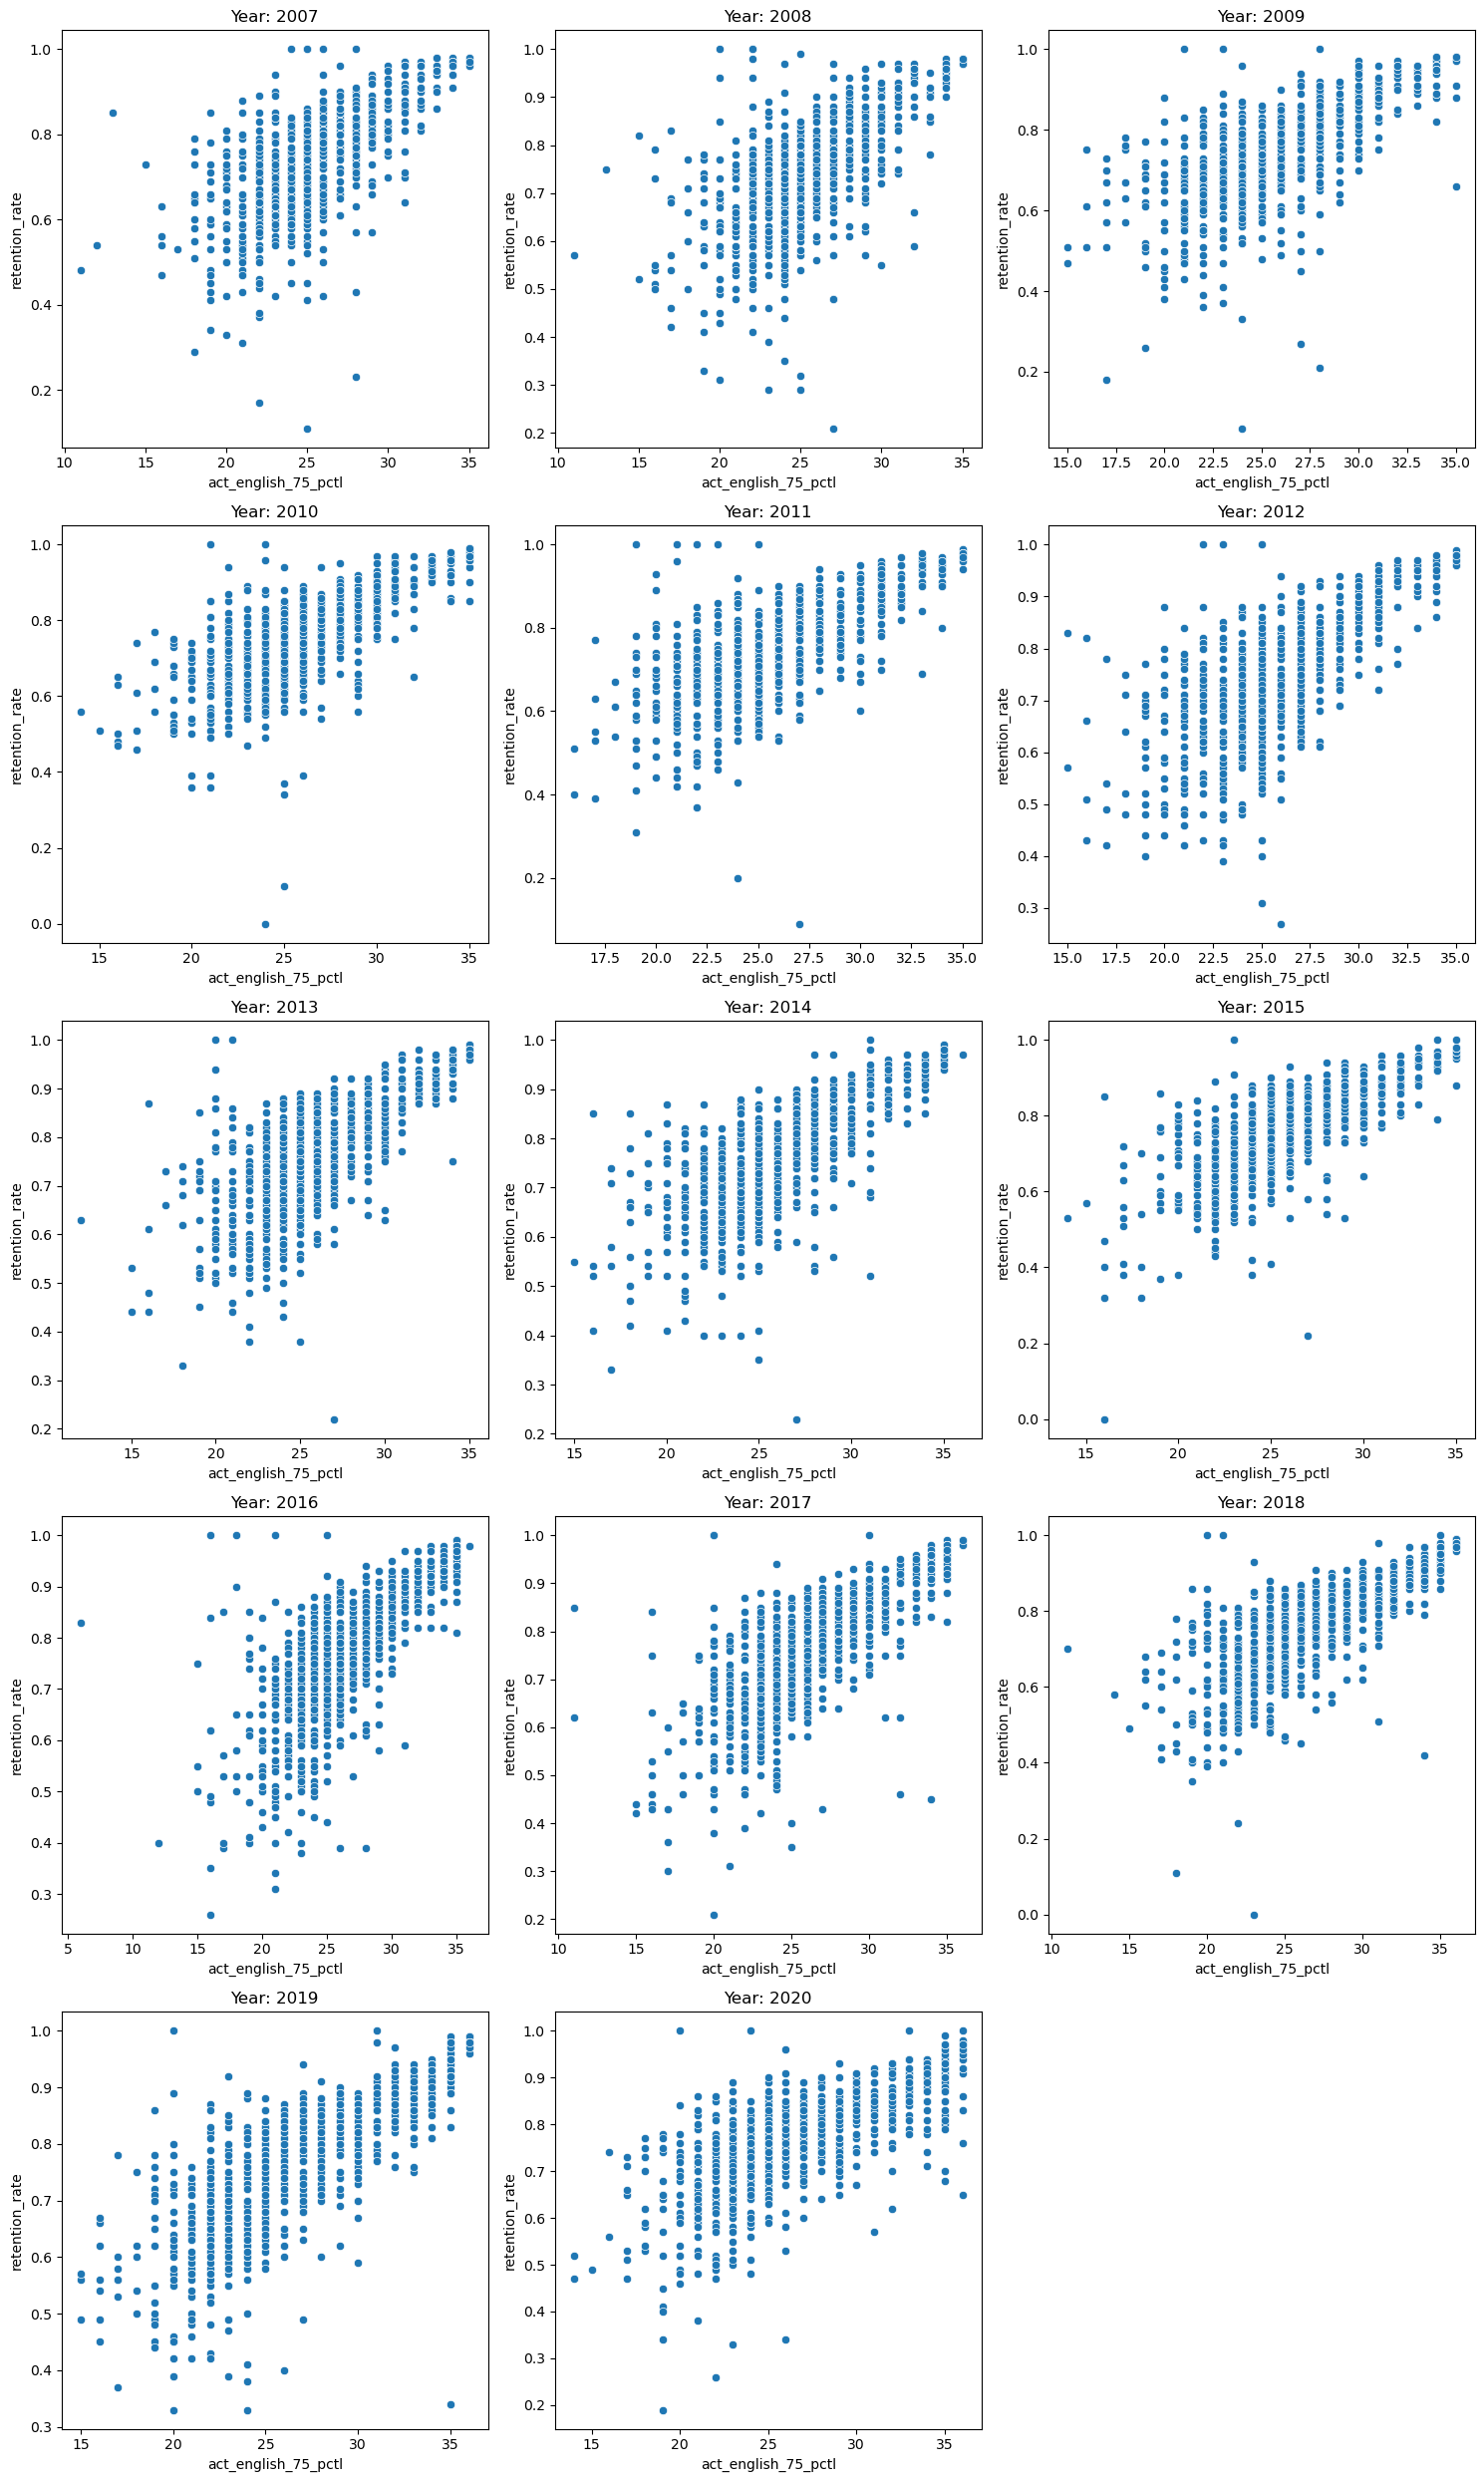

In [40]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='act_english_75_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots



C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2292547996.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2292547996.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2292547996.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2292547996.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\2292547996.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layouts so they don't overlap
C:\Users\Richard Han\AppData\Local\Temp\ipykernel_11380\229254799

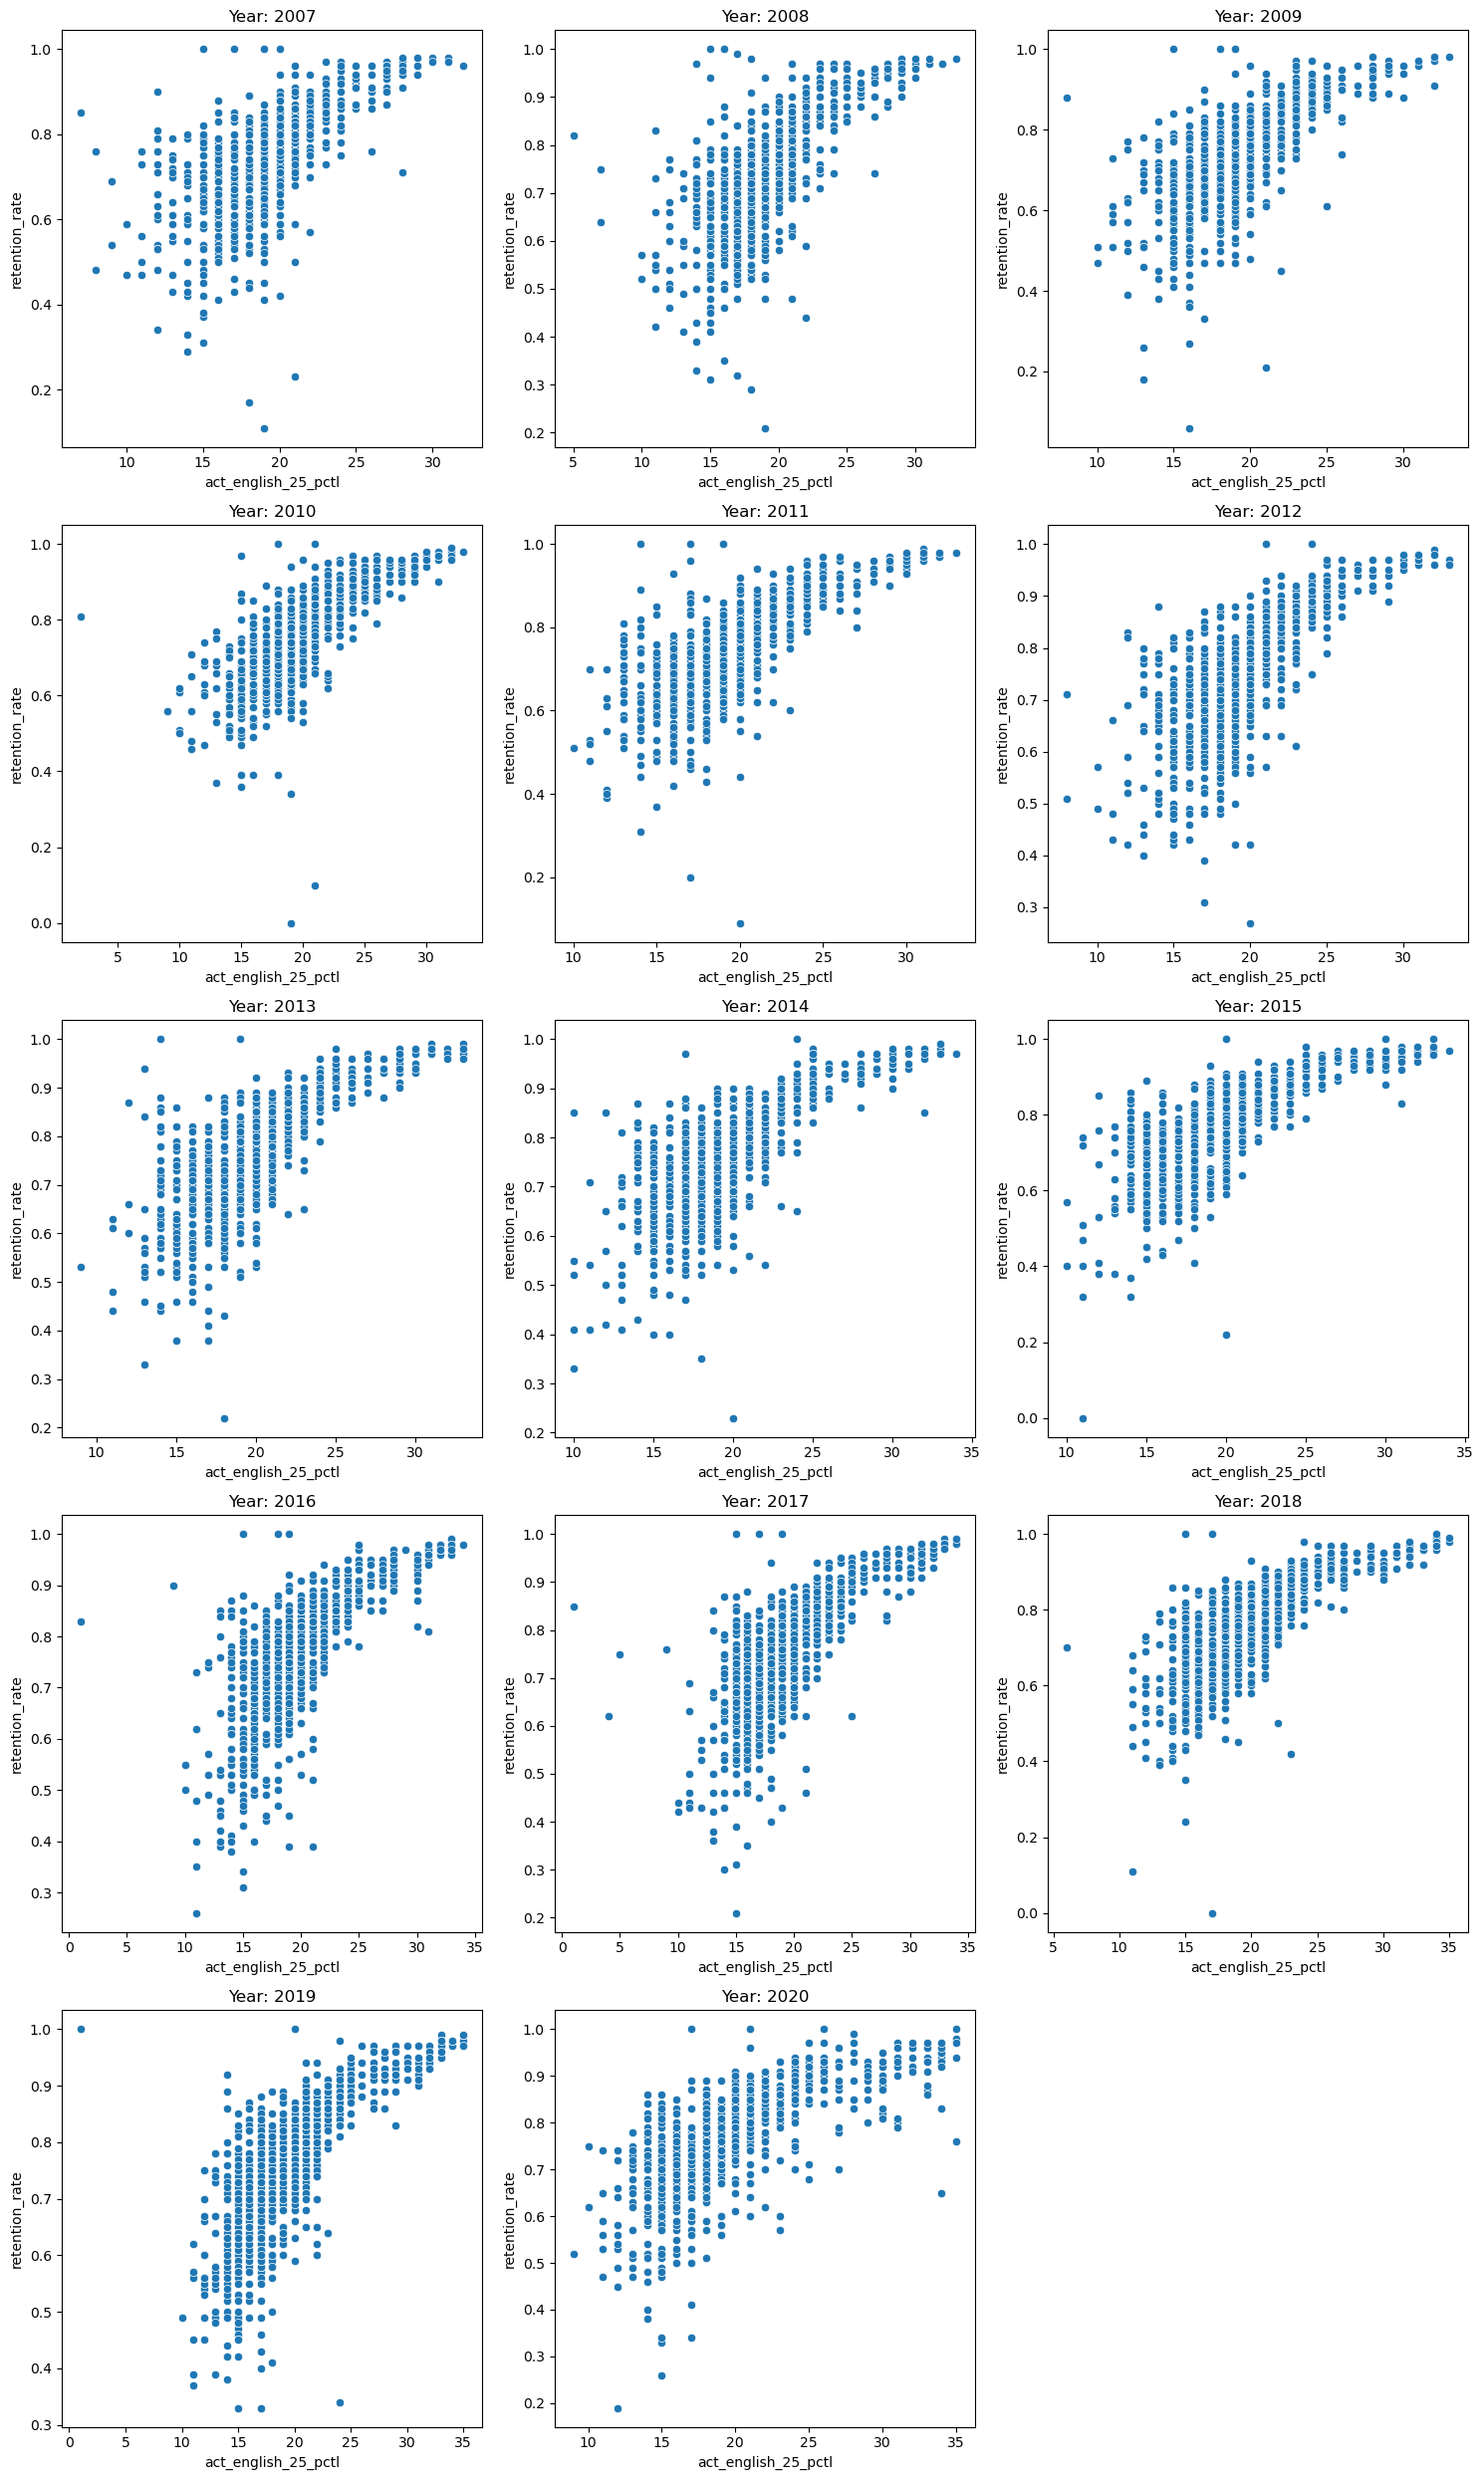

In [41]:
#Plot the retention vs scores plots for each year
import matplotlib.pyplot as plt
import seaborn as sns

years = sorted(cleaned_df_all_years['year'].unique())  # Get all unique years and sort them

# Determine the layout of the subplots (e.g., 3 columns)
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the overall figure size as needed

for i, year in enumerate(years, 1):  # Loop through each year, starting with 1
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each year
    df_year = cleaned_df_all_years[cleaned_df_all_years['year'] == year]  # Filter data for the current year
    sns.scatterplot(data=df_year, x='act_english_25_pctl', y='retention_rate')  # Create scatter plot
    plt.title(f'Year: {year}')  # Set title for each subplot to indicate the year
    plt.tight_layout()  # Adjust layouts so they don't overlap

plt.show()  # Display the giant plot with all subplots

